# REACHING_TASK --> Use this kernal

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')


### Make sure you use version 2.2.0 of pynwb
- pip uninstall pynwb
- pip install pynwb==2.2.0

In [2]:
import pynwb
print(pynwb.__version__)

2.3.3


# Paths needed to be changed to your own paths

In [3]:
# Load mouse_name from .env
import os
from dotenv import load_dotenv

load_dotenv()

# Ensure that the MOUSE_NAME environment variable is set
MOUSE = os.getenv('MOUSE')
if MOUSE is None:
    raise ValueError("MOUSE_NAME environment variable is not set. Please set it to the name of the mouse.")
else:
    print(f"MOUSE loaded: {MOUSE}")
    print('\n')

print('-- First Neuropixels File --')
NP_FILE = os.getenv('NP_FILE')
if NP_FILE is None:
    raise ValueError("NP_FILE environment variable is not set. Please set it to the path of the neuropixels file.")
else:
    print(f"NP_FILE loaded: {NP_FILE}")

DATE = os.getenv('DATE')
if DATE is None:
    raise ValueError("DATE environment variable is not set. Please set it to the date of the recording.")
else:
    print(f"DATE loaded: {DATE}")

SESSION = os.getenv('SESSION')
if SESSION is None:
    raise ValueError("SESSION environment variable is not set. Please set it to the session number.")
else:
    print(f"SESSION loaded: {SESSION}")

print('\n')
print('-- Second Neuropixels File --')
NP_FILE_01 = os.getenv('NP_FILE_01')
if NP_FILE_01 is None:
    raise ValueError("NP_FILE_01 environment variable is not set. Please set it to the path of the neuropixels file.")
else:
    print(f"NP_FILE loaded: {NP_FILE_01}")

DATE_01 = os.getenv('DATE_01')
if DATE_01 is None:
    raise ValueError("DATE_01 environment variable is not set. Please set it to the date of the recording in MMDD format.")
else:
    print(f"DATE_01 loaded: {DATE_01}")

SESSION_01 = os.getenv('SESSION_01')
if SESSION_01 is None:
    raise ValueError("SESSION_01 environment variable is not set. Please set it to the session number in MMDD format.")
else:
    print(f"SESSION_01 loaded: {SESSION_01}")

print('\n')
print('-- Third Neuropixels File --')
NP_FILE_02 = os.getenv('NP_FILE_02')
if NP_FILE_02 is None:
    raise ValueError("NP_FILE_02 environment variable is not set. Please set it to the path of the second neuropixels file.")
else:
    print(f"NP_FILE_02 loaded: {NP_FILE_02}")

DATE_02 = os.getenv('DATE_02')
if DATE_02 is None:
    raise ValueError("DATE_02 environment variable is not set. Please set it to the date of the recording in MMDD format.")
else:
    print(f"DATE_02 loaded: {DATE_02}")

SESSION_02 = os.getenv('SESSION_02')
if SESSION_02 is None:
    raise ValueError("SESSION_02 environment variable is not set. Please set it to the session number in MMDD format.")
else:
    print(f"SESSION_02 loaded: {SESSION_02}")


print('\n')
print('-- Behavioral Files --')
BEHAVIORAL_FOLDER = os.getenv('BEHAVIORAL_FOLDER')
if BEHAVIORAL_FOLDER is None:
    raise ValueError("BEHAVIORAL_FOLDER environment variable is not set. Please set it to the path of the behavioral recordings.")
else:
    print(f"BEHAVIORAL_FOLDER loaded: {BEHAVIORAL_FOLDER}")




MOUSE loaded: reach12


-- First Neuropixels File --
NP_FILE loaded: reach12_testing_026_2025-09-03_19-02-09_004
DATE loaded: 20250903
SESSION loaded: session005


-- Second Neuropixels File --
NP_FILE loaded: Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40
DATE_01 loaded: 20251110
SESSION_01 loaded: session005


-- Third Neuropixels File --
NP_FILE_02 loaded: NA
DATE_02 loaded: NA
SESSION_02 loaded: NA


-- Behavioral Files --
BEHAVIORAL_FOLDER loaded: grant_reach12_swingDoor-christie


### Set which session you would like to use
- change the session the bellow 3 variables point too (NP_FILE, DATE, SESSION)
- simply uncomment the session you want to analyze

In [4]:
# Change these for the specific session you want to analyze
# NP_FILE = NP_FILE
# DATE = DATE
# SESSION = SESSION


# Change these for the specific session you want to analyze
NP_FILE = NP_FILE_01
DATE = DATE_01
SESSION = SESSION_01

# Change these for the specific session you want to analyze
# NP_FILE = NP_FILE_02
# DATE = DATE_02
# SESSION = SESSION_02


print(f'NP_FILE: {NP_FILE}')
print(f'DATE: {DATE}')
print(f'SESSION: {SESSION}')
print(f'BEHAVIORAL_FOLDER: {BEHAVIORAL_FOLDER}')

NP_FILE: Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40
DATE: 20251110
SESSION: session005
BEHAVIORAL_FOLDER: grant_reach12_swingDoor-christie


In [5]:
# Construct the recording folder path
root_recording_folder = fr"G:\Grant\neuropixels\raw_recordings\{NP_FILE}"  # Replace with actual root path
recording_folder = os.path.join(root_recording_folder, "Record Node 103", "experiment1", "recording1", "continuous")


#root_behavior_path = fr"G:\Grant\neuropixels\behavioral_recordings\{BEHAVIORAL_FOLDER}"
# Example values (replace as needed)A
root_behavior_path = fr"G:\Grant\behavior_data\DLC_net\{BEHAVIORAL_FOLDER}"
behavioral_folder = os.path.join(root_behavior_path, DATE, SESSION)
print(f'behavioral_folder: {behavioral_folder}')
# Check if the recording folder exists
if not os.path.exists(recording_folder):
    raise FileNotFoundError(f"Recording folder not found: {recording_folder}")
else:
    print("Neuropixel Recording folder found:", recording_folder)


behavioral_folder: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\20251110\session005
Neuropixel Recording folder found: G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\Record Node 103\experiment1\recording1\continuous


In [6]:

recording_folder = root_recording_folder + r"\Record Node 103\experiment1\recording1\continuous"
if not os.path.exists(recording_folder):
    raise FileNotFoundError(f"Recording folder not found: {recording_folder}")
else:
    print("Recording folder found: ", recording_folder)

Recording folder found:  G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\Record Node 103\experiment1\recording1\continuous


##### Find the behavior files from the recording folder
- if threy are not found, you will need to manually specify the behavior file paths

In [7]:
# root_behavior_path = r'Z:\PHYS\ChristieLab\Lab Management\Grant\reaching_data\compressed_data\Reach7\20241204\christielab\session006'
# date = '20241204'
# session_num = 'session006'

In [92]:
import os

# Example values (replace as needed)
#root_behavior_path = fr"G:\Grant\behavior_data\DLC_net\{BEHAVIORAL_FOLDER}"


# Build full paths
frontCam_events_txt = os.path.join(
    root_behavior_path, "videos", DATE, "christielab", SESSION,
    f"{DATE}_christielab_{SESSION}_events.txt"
)

frontCam_timestamps = os.path.join(
    root_behavior_path, "videos", DATE, "christielab", SESSION,
    f"{DATE}_christielab_{SESSION}_frontCam_timestamps.txt"
)

stim_frame_path = os.path.join(
    root_behavior_path, "videos", DATE, "christielab", SESSION,
    f"{DATE}_christielab_{SESSION}_stimCam_timestamps.txt"
)

set_delay_list_path = os.path.join(
    root_behavior_path, "videos", DATE, "christielab", SESSION,
    f"{DATE}_christielab_{SESSION}_trial_delays.npy"
)


stimROI_frames_path = os.path.join(
    root_behavior_path, "videos", DATE, "christielab", SESSION,
    f"{DATE}_christielab_{SESSION}_stimCam_stim_frames.npy"
)


# Check existence and print paths
print("Checking for Behavior files...")
print("Root behavior path:", root_behavior_path)
print("FrontCam events txt file:", frontCam_events_txt)
print("FrontCam timestamps txt file:", frontCam_timestamps)
print("Stimulus frame txt file:", stim_frame_path)
print("set_delay_list_path .npy file:", set_delay_list_path)
print("stimROI_frames_path .npy file:", stimROI_frames_path)

print('')

# File existence checks
if not os.path.exists(frontCam_events_txt):
    raise FileNotFoundError("FrontCam events txt file not found")
if not os.path.exists(frontCam_timestamps):
    raise FileNotFoundError("FrontCam timestamps txt file not found")
if not os.path.exists(stim_frame_path):
    raise FileNotFoundError("Stimulus frame txt file not found")
if not os.path.exists(set_delay_list_path):
    raise FileNotFoundError("trail delays .npy file not found")
if not os.path.exists(stimROI_frames_path):
    raise FileNotFoundError("trail delays .npy file not found")
else:
    print("✅ All Behavior files found")


Checking for Behavior files...
Root behavior path: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie
FrontCam events txt file: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_session005_events.txt
FrontCam timestamps txt file: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_session005_frontCam_timestamps.txt
Stimulus frame txt file: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_session005_stimCam_timestamps.txt
set_delay_list_path .npy file: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_session005_trial_delays.npy
stimROI_frames_path .npy file: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_ses

### Load the set frames that stimROI was sent on
- lives in own .npy file

In [99]:
# load in delay_list
stimROI_frames_list = np.load(stimROI_frames_path)
print(f"Loaded delay list with {len(stimROI_frames_list)} entries.")
print(f"Example entry: {list(stimROI_frames_list)[0]}\n")  # Show an example entry
stimROI_frames_list

Loaded delay list with 17 entries.
Example entry: 70739



array([ 70739,  78678,  83120,  87406,  93532,  96495, 100897, 103051,
       105232, 109347, 111768, 113915, 116048, 118183, 120300, 122407,
       125341])

### Load the set delays from behavior recording session

In [93]:
# load in delay_list
set_delay_list = np.load(set_delay_list_path)
print(f"Loaded delay list with {len(set_delay_list)} entries.")
print(f"Example entry: {list(set_delay_list)[0]}\n")  # Show an example entry
set_delay_list

Loaded delay list with 60 entries.
Example entry: 100



array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100])

In [94]:
set_delay_list = set_delay_list[3:8]
set_delay_list

array([100, 100, 100, 100, 100])

#### Create a file name for the NWB file
- if an NWB already exists for this session, a new NWB file will be created with a timestamp added to the file name, so you dont over write the old file"

In [95]:
# THIS SHOULD NOT just point to the folder, but needs to include the name you want the nwb file to be called /nwb_file_name
nwb_save_path = fr"G:\Grant\neuropixels\nwb\{NP_FILE}"

if not os.path.exists(nwb_save_path):
    print("Now NWB file found with this name, creating it now: ", nwb_save_path)
else:
    print("NWB save file already exists, saving you from overwriting your data by adding a timestamp to the end of the file name")
    nwb_save_path = nwb_save_path +'__' + dt.datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")

print("NWB file will be saved as: ", nwb_save_path)

Now NWB file found with this name, creating it now:  G:\Grant\neuropixels\nwb\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40
NWB file will be saved as:  G:\Grant\neuropixels\nwb\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40


#### Create directories for reach event data to save to

In [96]:
reach_event_save_path = root_recording_folder+ '\\all_reach_events'
full_reach_event_save_path = root_recording_folder+ '\\full_reach_events'

# Careful as this will plot all the reaches in the recording, if you have a long recording this will take a long time
if not os.path.exists(reach_event_save_path):
    os.makedirs(reach_event_save_path)
    print('Directory created: , ', reach_event_save_path)
else:
    print('Directory already exists: ', reach_event_save_path)

if not os.path.exists(full_reach_event_save_path):
    os.makedirs(full_reach_event_save_path)
    print('Directory created: ', full_reach_event_save_path)
else:
    print('Directory already exists: ', full_reach_event_save_path)

Directory already exists:  G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\all_reach_events
Directory already exists:  G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\full_reach_events


In [97]:
#recording_folder = root_recording_folder
stim_path = frontCam_events_txt
frame_path = frontCam_timestamps
#nwb_path = save_path_nwb

### Load in raw recording data

In [14]:
recording_folder = root_recording_folder
# recording_folder = r'G:/Grant/rotation/2023-09-29_16-07-39_PaBont2'

experimenter = 'Grant Robert Hughes'
experiment_description= 'Christie Lab, University of Colorado Anschutz. Reaching C57 Mouse with ChR2-Retro injected in Simplex Lobule, and Fiber Optic Implanted in Pontine Gray to Induce missed reaches.'

# #spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A', 'B','C','D','E','F'] 

# Use MPM-relative probe depths (in microns)
probedepths = [3150,7000,1650,4600,6000,4600] 

### Read in .txt files with event times logged as frame numbers

In [100]:
from collections import defaultdict
import time

# Initialize defaultdicts
data = defaultdict(list)

# Measure time for file processing
start_time = time.time()

# Open and read the file
with open(stim_path, 'r') as file:
    lines = file.readlines()

# Parse the data
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        name, value = parts
        data[name].append(int(value))

print("File parsing completed in:", time.time() - start_time, "seconds")

# Access data directly
pellet_detected_frame = data['pellet_detected']
pellet_delivery_frame = data['pellet_delivery']
T5000_frame = data['T5000_played']
T6000_frame = data['T6000_played']
stim_sent_frame = data['stim_sent']

# Print summaries
print("Pellet Detected (First 5):", pellet_detected_frame[:5])
print("Total Detected Values:", len(pellet_detected_frame))
print("Pellet Delivery (First 5):", pellet_delivery_frame[:5])
print("Total Delivery Values:", len(pellet_delivery_frame))
print("Total T6000 Values:", len(T6000_frame))
print("T6000 Values (First 5):", T6000_frame[:5])
print("T5000 Values (First 5):", T5000_frame[:5])
print("Total T5000 Values:", len(T5000_frame))
print("stim_sent Values (First 5):", stim_sent_frame[:5])
print("Total stim_sent Values:", len(stim_sent_frame))
print("stimROI Frame Values (First 5):", stimROI_frames_list[:5])

# Divide each value by 150
pellet_detected_seconds = [v / 150 for v in pellet_detected_frame]
pellet_delivery_seconds = [v / 150 for v in pellet_delivery_frame]

print("\nPellet Detected (First 5 in Seconds):", pellet_detected_seconds[:5])
print("Pellet Delivery (First 5 in Seconds):", pellet_delivery_seconds[:5])

# Slow motion factor
slow_motion_factor = 4.994614744995619

pellet_delivery_slow_motion = [t * slow_motion_factor for t in pellet_delivery_seconds]
pellet_detected_slow_motion = [t * slow_motion_factor for t in pellet_detected_seconds]

print("\nPellet Detected Aligned to Slow Motion Video (First 5):", pellet_detected_slow_motion[:5])
print("Pellet Delivery Aligned to Slow Motion Video (First 5):", pellet_delivery_slow_motion[:5])

# Convert to minutes
detected_slowmo_minutes_array = [seconds / 60 for seconds in pellet_detected_slow_motion]
delivery_slowmo_minutes_array = [seconds / 60 for seconds in pellet_delivery_slow_motion]

print("\nPellet Detected (Slow Motion in Minutes - First 5):", detected_slowmo_minutes_array[:5])
print("Pellet Delivery (Slow Motion in Minutes - First 5):", delivery_slowmo_minutes_array[:5])


File parsing completed in: 0.015946388244628906 seconds
Pellet Detected (First 5): [2553, 6441, 8416, 10575, 12726]
Total Detected Values: 71
Pellet Delivery (First 5): [8456, 10613, 12768, 20770, 22965]
Total Delivery Values: 61
Total T6000 Values: 82
T6000 Values (First 5): [542, 2471, 4446, 6361, 8335]
T5000 Values (First 5): [8461, 10618, 12774, 20775, 22970]
Total T5000 Values: 61
stim_sent Values (First 5): [70787, 78713, 83120, 87407, 93580]
Total stim_sent Values: 18
stimROI Frame Values (First 5): [70739 78678 83120 87406 93532]

Pellet Detected (First 5 in Seconds): [17.02, 42.94, 56.10666666666667, 70.5, 84.84]
Pellet Delivery (First 5 in Seconds): [56.373333333333335, 70.75333333333333, 85.12, 138.46666666666667, 153.1]

Pellet Detected Aligned to Slow Motion Video (First 5): [85.00834295982544, 214.46875715011188, 280.2311846258876, 352.12033952219116, 423.74311496542833]
Pellet Delivery Aligned to Slow Motion Video (First 5): [281.5630818912197, 353.3856419242567, 425.141

##### verify the numbe of events 

In [101]:
print("total Detected Values:", len(pellet_detected_frame))
print("total Delivery Values:", len(pellet_delivery_frame))
print("total T5000 Values:", len(T5000_frame))
print("total T6000 Values:", len(T6000_frame))
print("total stim_sent Values:", len(stim_sent_frame))
print("total stim_sent frame values:", len(stimROI_frames_list))


total Detected Values: 71
total Delivery Values: 61
total T5000 Values: 61
total T6000 Values: 82
total stim_sent Values: 18
total stim_sent frame values: 17


### load in .txt file containing each frame number. stored as time between frame in nano-seconds

In [103]:
frame_path = frontCam_timestamps
# Initialize an empty list to store the numbers
frames = []

# Open and read the text file
with open(frame_path, 'r') as file:
    print(f'Chcking File: {stim_frame_path}')
    print('')
    for line in file:
        number = int(line.strip())
        frames.append(number)

# Now, 'numbers' is a list containing all the numbers from the text file
print("Numbers Array:", frames[0:5])
print("total frames: ", len(frames))

# frame_numbers = [index + 1 for index in range(len(frames))]
frame_numbers = [(index + 1) / 150 for index in range(len(frames))]
frames_txt_file = [(index + 1) for index in range(len(frames))]



print('frame numbers: ', frame_numbers[0:5])
print('Recording Time Seconds:', len(frame_numbers)/150)
print('Recording Time Minutes:', len(frame_numbers)/150 / 60)




Chcking File: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_session005_stimCam_timestamps.txt

Numbers Array: []
total frames:  0
frame numbers:  []
Recording Time Seconds: 0.0
Recording Time Minutes: 0.0


In [104]:
import time

# Initialize variables
frames = []

# Measure time for file reading
start_time = time.time()

# Open and read the text file
with open(stim_frame_path, 'r') as file:
    print(f'Chcking File: {stim_frame_path}')
    print('')
    frames = [int(line.strip()) for line in file]

print("File parsing completed in:", time.time() - start_time, "seconds")

# Summarize frames
print("Total Frames:", len(frames))
print("First 5 Frames:", frames[:5])

# Compute frame numbers and related time metrics
frame_numbers = [(index + 1) / 150 for index in range(len(frames))]
frames_txt_file = [index + 1 for index in range(len(frames))]

# Print results
print("\nFrame Numbers (First 5):", frame_numbers[:5])
print("Recording Time (Seconds):", len(frame_numbers) / 150)
print("Recording Time (Minutes):", len(frame_numbers) / 150 / 60)


Chcking File: G:\Grant\behavior_data\DLC_net\grant_reach12_swingDoor-christie\videos\20251110\christielab\session005\20251110_christielab_session005_stimCam_timestamps.txt

File parsing completed in: 0.0462949275970459 seconds
Total Frames: 180912
First 5 Frames: [6636648, 6698352, 6639184, 6694784, 6636168]

Frame Numbers (First 5): [0.006666666666666667, 0.013333333333333334, 0.02, 0.02666666666666667, 0.03333333333333333]
Recording Time (Seconds): 1206.08
Recording Time (Minutes): 20.101333333333333


### Plot the time between each frame, to see drop frames
- each big blue spike is a droppe frame (womp womp)

total frame timestamps: 180912
recording duration seconds: 1206.08
recording duration minutes: 20.101333333333333


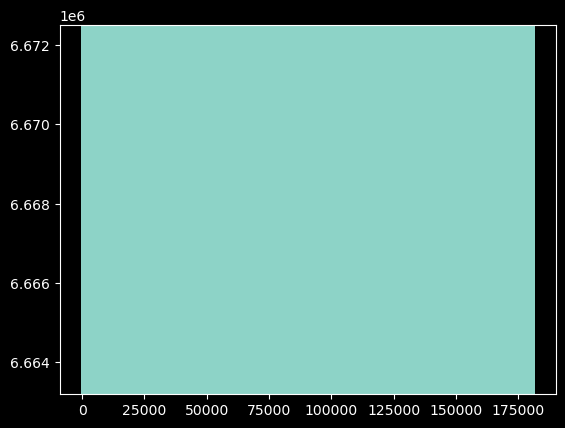

In [19]:
txt_file_frame_count = len(frames)
print("total frame timestamps:", txt_file_frame_count)
print("recording duration seconds:", txt_file_frame_count/150)
print("recording duration minutes:", txt_file_frame_count/150/60)
plt.ylim(6663200, 6672500)
plt.plot((frames))



### Load in the events data, logged in the digial lines of the openephys aquisition. and stored in the events folder of your recording

In [20]:
from open_ephys.analysis import Session

directory = recording_folder # for example
directory = root_recording_folder # for example


session = Session(directory)
print(f'session: {session}')


session: 
Open Ephys Recording Session Object
Directory: G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40

<object>.recordnodes:
  Index 0: Record Node 103 (binary format)



In [21]:
session.recordnodes[0].recordings[0].events
session.recordnodes[0].recordings[0].events

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,1,710994,284.690706,100,6,ProbeE-LFP,1
1,1,710987,284.690874,100,8,ProbeF-LFP,1
2,1,8540727,284.690900,100,0,ProbeA,1
3,1,8531822,284.690908,100,4,ProbeD,1
4,1,8531846,284.690911,100,7,ProbeF-AP,1
...,...,...,...,...,...,...,...
205781,1,44967423,1499.195614,100,5,ProbeE-AP,0
205782,1,44975970,1499.195621,100,1,ProbeB-AP,0
205783,1,44966833,1499.195622,100,4,ProbeD,0
205784,1,44975794,1499.195626,100,3,ProbeC,0


In [22]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)


# Speical global_timestamps df 
- this is used ONLY if your timestamps get messed up due to a syncronization issue during the recording, otherwise do not run the cell bellow
#### Here are the steps to make a global_timestamps df if our data is messed up
- use the manually_align_timestamps.ipynb file 

In [23]:
# global_timestamps_df = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\Record Node 103\experiment1\recording1\events\global_timestamps\global_timestamps_overwrite.csv"
# events_df = pd.read_csv(global_timestamps_df)
# events_df

### Verify all event types are being recorded

In [24]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeA_AP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state


In [25]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeB_AP = events_df[events_df.stream_name == 'ProbeB-AP' ]
probeC_AP = events_df[events_df.stream_name == 'ProbeC' ]
probeD_AP = events_df[events_df.stream_name == 'ProbeD-AP' ]
probeE_AP = events_df[events_df.stream_name == 'ProbeE-AP' ]


In [26]:
ni_df = events_df[events_df.stream_name == 'PXIe-6341' ]
ni_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
8,7,8532259,284.690936,102,9,PXIe-6341,1
18,7,8547260,285.190930,102,9,PXIe-6341,0
26,7,8562261,285.690925,102,9,PXIe-6341,1
38,7,8577263,286.190953,102,9,PXIe-6341,0
48,7,8592264,286.690947,102,9,PXIe-6341,1
...,...,...,...,...,...,...,...
205737,7,44910217,1497.195577,102,9,PXIe-6341,0
205751,7,44925219,1497.695605,102,9,PXIe-6341,1
205759,7,44940220,1498.195599,102,9,PXIe-6341,0
205769,7,44955221,1498.695594,102,9,PXIe-6341,1


### SideCam Frame numbers are recorded in the events folder on digital line 8, and the rest of the digial lines are made into veraibles below 
- Digital Line 8

In [27]:
frame_events = ni_df[ni_df['line'] == 8]
frame_events


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
100,8,8672530,289.366273,102,9,PXIe-6341,1
101,8,8672557,289.367173,102,9,PXIe-6341,0
102,8,8672758,289.373872,102,9,PXIe-6341,1
103,8,8672957,289.380505,102,9,PXIe-6341,0
104,8,8673158,289.387205,102,9,PXIe-6341,1
...,...,...,...,...,...,...,...
205711,8,44876760,1496.080430,102,9,PXIe-6341,0
205712,8,44876961,1496.087129,102,9,PXIe-6341,1
205713,8,44877160,1496.093762,102,9,PXIe-6341,0
205714,8,44877361,1496.100462,102,9,PXIe-6341,1


### Sync pulse is recorded on digital line 7, every half second
- Digital line 7

In [28]:
sync_pulse_events = ni_df[ni_df['line'] == 7]
sync_pulse_events


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
8,7,8532259,284.690936,102,9,PXIe-6341,1
18,7,8547260,285.190930,102,9,PXIe-6341,0
26,7,8562261,285.690925,102,9,PXIe-6341,1
38,7,8577263,286.190953,102,9,PXIe-6341,0
48,7,8592264,286.690947,102,9,PXIe-6341,1
...,...,...,...,...,...,...,...
205737,7,44910217,1497.195577,102,9,PXIe-6341,0
205751,7,44925219,1497.695605,102,9,PXIe-6341,1
205759,7,44940220,1498.195599,102,9,PXIe-6341,0
205769,7,44955221,1498.695594,102,9,PXIe-6341,1


### TTL for Tone-1 (Each single optical pulse gets one TTL) 
- Digital line 6

In [29]:
tone1_events = ni_df[ni_df['line'] == 6]
tone1_events.head()


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
713,6,8780825,292.975801,102,9,PXIe-6341,1
717,6,8781573,293.000733,102,9,PXIe-6341,0
2902,6,9166329,305.824947,102,9,PXIe-6341,1
2907,6,9167077,305.849878,102,9,PXIe-6341,0
5139,6,9561403,318.993068,102,9,PXIe-6341,1


### TTL for Tone-2 
- Digital line 5

In [30]:
tone2_events = ni_df[ni_df['line'] == 5]
tone2_events


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
9698,5,10364095,345.747352,102,9,PXIe-6341,1
9702,5,10364842,345.772250,102,9,PXIe-6341,0
12139,5,10795683,360.132547,102,9,PXIe-6341,1
12144,5,10796430,360.157445,102,9,PXIe-6341,0
14589,5,11226821,374.502683,102,9,PXIe-6341,1
...,...,...,...,...,...,...,...
197316,5,43395238,1446.700216,102,9,PXIe-6341,0
199746,5,43824698,1461.014456,102,9,PXIe-6341,1
199751,5,43825446,1461.039388,102,9,PXIe-6341,0
202148,5,44248275,1475.132570,102,9,PXIe-6341,1


### TTL for stimROI crossing 
(TTL created when paw passes through stimulus ROI and the mean luminance is above threshold)
- Digital line 4

In [31]:
stimROI_events = ni_df[ni_df['line'] == 4]
stimROI_events.head()


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
80382,4,22822844,761.006822,102,9,PXIe-6341,1
80385,4,22822994,761.011822,102,9,PXIe-6341,0
89404,4,24410957,813.939828,102,9,PXIe-6341,1
89407,4,24411107,813.944828,102,9,PXIe-6341,0
94458,4,25299962,843.571023,102,9,PXIe-6341,1


### This is Optical Pulses (each indvidual time the optical shutter was opened and for how long it was open)
- Digital line 3

In [32]:
optical_events = ni_df[ni_df['line'] == 3]
optical_events.head()

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
80384,3,22822994,761.011822,102,9,PXIe-6341,1
80386,3,22823144,761.016821,102,9,PXIe-6341,0
80388,3,22823294,761.021821,102,9,PXIe-6341,1
80391,3,22823444,761.026821,102,9,PXIe-6341,0
80393,3,22823594,761.031820,102,9,PXIe-6341,1


# Sort the global_timestamps dataframe by the 'global_timestamps' column
- required for some reason

In [34]:
frame_events = frame_events.sort_values(by="timestamp", ascending=True)
sync_pulse_events = sync_pulse_events.sort_values(by="timestamp", ascending=True)
tone1_events = tone1_events.sort_values(by="timestamp", ascending=True)
tone2_events = tone2_events.sort_values(by="timestamp", ascending=True)
stimROI_events = stimROI_events.sort_values(by="timestamp", ascending=True)
optical_events = optical_events.sort_values(by="timestamp", ascending=True)


In [35]:
probeA_AP = probeA_AP.sort_values(by="timestamp", ascending=True)
probeB_AP = probeB_AP.sort_values(by="timestamp", ascending=True)
probeC_AP = probeC_AP.sort_values(by="timestamp", ascending=True)
probeD_AP = probeD_AP.sort_values(by="timestamp", ascending=True)
probeE_AP = probeE_AP.sort_values(by="timestamp", ascending=True)

In [37]:
probeB_AP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
7,1,8540749,284.690928,100,1,ProbeB-AP,1
17,1,8555749,285.190927,100,1,ProbeB-AP,0
27,1,8570749,285.690926,100,1,ProbeB-AP,1
36,1,8585749,286.190925,100,1,ProbeB-AP,0
45,1,8600749,286.690924,100,1,ProbeB-AP,1
...,...,...,...,...,...,...,...
205744,1,44915970,1497.195625,100,1,ProbeB-AP,0
205754,1,44930970,1497.695624,100,1,ProbeB-AP,1
205762,1,44945970,1498.195623,100,1,ProbeB-AP,0
205773,1,44960970,1498.695622,100,1,ProbeB-AP,1


### This cell is old and splits the data in half, but i now know the data is not split in half evenly. sometimes tone1 goes off and no tone2 goes off

In [38]:
# extract every 2nd value from the array and make it a new array, do the same for the other array
# tone1_events = tone1_2_events.iloc[::2, :]
# tone2_events = tone2_events.iloc[1::2, :]

#### extract the timestamps from the rows for each events dataframe  
- get array of the synchronized timestamps for all digital events

In [67]:
# frame_timestamps = frame_events['timestamp'].values
# print(f'goal: {60/150}')
# print(f'frames count {len(frame_timestamps)}')
# print(f'frame: {len(frame_timestamps)/150}')
# frame_timestamps[6] - frame_timestamps[1]

In [40]:
# Digital Line 8
frame_timestamps = frame_events['timestamp'].values

# Digital Line 7
sync_pulse_timestamps = sync_pulse_events['timestamp'].values
sync_pulse_timestamps = sync_pulse_timestamps[0::2]

# Digital Line 6
tone1_timestamps = tone1_events['timestamp'].values
tone1_timestamps = tone1_timestamps[0::2]

# Digital Line 5 (NEED TO SET THIS UP FROM BUTTON)
tone2_timestamps  = tone2_events['timestamp'].values
tone2_timestamps = tone2_timestamps[0::2]

# Digital Line 4
stimROI_timestamps  = stimROI_events['timestamp'].values
stimROI_timestamps = stimROI_timestamps[0::2]

# Digital Line 3
optical_timestamps = optical_events['timestamp'].values
# Digital Line 3 --> (every 5th value)
first_optical_timestamp_per_event = optical_events['timestamp'].values
first_optical_timestamp_per_event = first_optical_timestamp_per_event[1::5]





### Check that the timestamps are correct
- first part, check the total number of timestamps make sense
- Second part, check that the logic of the time stamps makes sense

In [105]:
print('Part 1: ')
print('frame timestamps:', len(frame_events))
print('sync_pulse timestamps:', len(sync_pulse_timestamps)) # 1hz
print('tone1 timestamps:', len(tone1_timestamps))
print('tone2 timestamps:', len(tone2_timestamps))
print('stimROI timestamps:', len(stimROI_timestamps))
print('optical timestamps:', len(optical_timestamps))
print('stimROI Frames:', len(stimROI_frames_list))

print('')
print('Part 2: ')
print('behavior video duration (min) using frames: ', round((len(frame_timestamps) / 150 / 60), 2))
print('open-ephys recording duration (min) using sync pulses: ', round((len(sync_pulse_timestamps) / 60), 2))
print('frame rate of camera (Value should be close to 150): ', round(len(frame_timestamps) / len(sync_pulse_timestamps), 2))
print('Avg time between frames (Goal is 0.40): ', round(np.mean(np.diff(frame_timestamps)) * 100, 2))
print('Avg time between sync pulses (Goal is 1.0): ', round(np.mean(np.diff(sync_pulse_timestamps)), 2))
print('Avg time between stimROI (should be roughly 15-20 seconds apart): ', round(np.mean(np.diff(stimROI_timestamps)), 2))
print('Avg time between first optical pulses (should be roughly identical to the value above for Avg time between stimROI): ', round(np.mean(np.diff(first_optical_timestamp_per_event)), 2))





Part 1: 
frame timestamps: 180996
sync_pulse timestamps: 1215
tone1 timestamps: 82
tone2 timestamps: 61
stimROI timestamps: 17
optical timestamps: 170
stimROI Frames: 17

Part 2: 
behavior video duration (min) using frames:  20.11
open-ephys recording duration (min) using sync pulses:  20.25
frame rate of camera (Value should be close to 150):  148.97
Avg time between frames (Goal is 0.40):  0.67
Avg time between sync pulses (Goal is 1.0):  1.0
Avg time between stimROI (should be roughly 15-20 seconds apart):  22.75
Avg time between first optical pulses (should be roughly identical to the value above for Avg time between stimROI):  11.03


#### Verify the duration of the recording, and the number of frames in the recording
- this should be the duration of the behavior video, not the full open-ephys recording duration. 
- because the open-ephys recording has baseline, opto-tagging, and other things making it longer

In [42]:
## Value should be 150, as the frame rate is 150 Hz, and the video was roughly 120 scoonds long
duration_of_video = 20 # in minutes

Behavior_video_length = duration_of_video * 60 # in seconds
print('value should be close to (150) because 150hz frame rate: ',len(frame_timestamps) / Behavior_video_length)

## Value is the duration of the behavior recording in minutes, because the frame rate is 150 Hz
print(len(frame_timestamps)/Behavior_video_length/60)


value should be close to (150) because 150hz frame rate:  150.83
2.5138333333333334


#### Verify the time between the StimROI and the frame in which you saw light on the camera
- the Difference between Stim TTL & the first frame with an optical pusle seen should be less that 1.0ms

In [43]:
# light_seen_frame = [940,3985,6181,8418,11143,15432]
# stim_number = 0

# for i in light_seen_frame:

#     first_light_frame_vs_StimTTL_difference = (stimROI_timestamps[stim_number] -  frame_timestamps[i]) *100

#     print('stim number:', stim_number+1)
#     print(f'stimROI TTL timestamps Vs. timestamp of frame with first optical pulse: ', stimROI_timestamps[stim_number].round(2),frame_timestamps[i].round(2))
#     print(f'Difference between Stim TTL & the first frame with an optical pusle seen: ', first_light_frame_vs_StimTTL_difference.round(2))
#     print('')
    
#     stim_number += 1
    

### Create a per trial dataframe for all events
- this will align all T5000 timestamps with the closet Optical Stim timestamp
- you end up with all 10 optical stims per trial added as events, second half of cell removes all but the first optical stim event


In [44]:
len(stimROI_timestamps), len(tone2_timestamps),len(stimROI_timestamps), print(stimROI_timestamps)

[ 761.00682221  813.93982823  843.5710234   872.13200162  912.96897058
  932.73165591  962.0800401   976.44133502  990.97739213 1018.41374944
 1034.56111439 1048.87528019 1063.0957283  1077.32506686 1091.44442282
 1105.48864241 1125.05060994]


(17, 61, 17, None)

In [46]:

i = 0
# New Code
aligned_optical_trials = []
for value in tone2_timestamps:
    buffer_hi = value + 5    # New Code
    buffer_lo = value - 5    # New Code

    # find any stimROI timestamps inside the buffer and choose the nearest to tone2  # New Code
    stim_candidates = [s for s in stimROI_timestamps if buffer_lo <= s <= buffer_hi]  # New Code
    stimROI_value = min(stim_candidates, key=lambda s: abs(s - value)) if stim_candidates else None  # New Code

    # keep optical alignment within the same buffer                                       # New Code
    for stim_count, optical_value in enumerate(optical_timestamps):                      # New Code
        if buffer_lo <= optical_value <= buffer_hi:                                      # New Code
            event = {                                                                    # New Code
                'T5000': value,                                                          # New Code
                'stimROI': stimROI_value,                                                # New Code
                'closed_loop_stim': optical_value,                                       # New Code
                'stim_count': stim_count,                                                # New Code
                'stim_present': True                                                     # New Code
            }                                                                            # New Code
            aligned_optical_trials.append(event)                                         # New Code
# no i increment needed                                                                  # New Code

    i += 1

print('--- All Optical Stim version ---')
print(aligned_optical_trials[0])
print(aligned_optical_trials[1])
print('\n')

### remove the duplicates from aligned_optical_trials
# this way you only have the first optical stim per trial
seen = set()
unique_trials = []

for entry in aligned_optical_trials:
    t = entry['T5000']
    if t not in seen:
        unique_trials.append(entry)
        seen.add(t)

print(f'Total Closed Loop Stim Trials: {len(unique_trials)}')
print('\n')
print('--- Removed Duplicate Stim Version ---')
print(unique_trials[0])
print(unique_trials[1])


## Turn the unique_trials dic into a pure python df 
cols = ['T5000','stimROI','closed_loop_stim','stim_count','stim_present']
pure_array = [[entry[c]for c in cols] for entry in unique_trials]

print('\n')
print('--- Turned Removed Duplicate Stim Version into a dataframe ---')
## Turn the unique_trials dic into a pandas df
cols = ['T5000','stimROI','closed_loop_stim','stim_count','stim_present']

t5000_optical_df = pd.DataFrame(unique_trials, columns=cols) 
t5000_optical_df


--- All Optical Stim version ---
{'T5000': 761.0018225949193, 'stimROI': 761.0068222070313, 'closed_loop_stim': 761.0118218191434, 'stim_count': 0, 'stim_present': True}
{'T5000': 761.0018225949193, 'stimROI': 761.0068222070313, 'closed_loop_stim': 761.0168214312555, 'stim_count': 1, 'stim_present': True}


Total Closed Loop Stim Trials: 16


--- Removed Duplicate Stim Version ---
{'T5000': 761.0018225949193, 'stimROI': 761.0068222070313, 'closed_loop_stim': 761.0118218191434, 'stim_count': 0, 'stim_present': True}
{'T5000': 813.8524016753872, 'stimROI': 813.9398282272314, 'closed_loop_stim': 813.9448278394223, 'stim_count': 10, 'stim_present': True}


--- Turned Removed Duplicate Stim Version into a dataframe ---


,T5000,stimROI,closed_loop_stim,stim_count,stim_present
0,761.001823,761.006822,761.011822,0,True
1,813.852402,813.939828,813.944828,10,True
2,842.852712,843.571023,843.576023,20,True
3,871.738999,872.132002,872.137035,30,True
4,912.973504,912.968971,912.973970,40,True
5,932.411714,932.731656,932.736656,50,True
6,961.871056,962.080040,962.085040,60,True
7,976.301179,976.441335,976.446335,70,True
8,990.856368,990.977392,990.982392,80,True
9,1017.994682,1018.413749,1018.418749,90,True


### Merge together all the T500 values with the organized T5000-> close loop optical values
- creates one coherent df to show you all the trials, and which ones had closed loop stim and which ones did not

In [53]:

# your extra timestamps list
tone1_events = tone1_timestamps  # or whatever you’ve named it
tone2_events = tone2_timestamps  # or whatever you’ve named it

# — do the union on two sets, then sort the result —
all_t6000 = sorted(
    set(t5000_optical_df['T5000']).union(tone2_events)
)

# build a DataFrame of every T5000
full_df = pd.DataFrame({'T5000': all_t6000})

# left-merge your original rows onto that
merged = full_df.merge(
    t5000_optical_df,
    on='T5000',
    how='left'
)

# fill “no-match” rows with zeros (or NaN if you prefer)
merged['closed_loop_stim'] = merged['closed_loop_stim'].fillna(0)
merged['stim_count']      = merged['stim_count'].fillna(0).astype(int)
T5000_closedLoop_stim_df = merged

T5000_closedLoop_stim_df['T5000_frame'] = T5000_frame

T5000_closedLoop_stim_df

,T5000,stimROI,closed_loop_stim,stim_count,stim_present,T5000_frame
0,345.747352,NaN,0.0,0,NaN,8461
1,360.132547,NaN,0.0,0,NaN,10618
2,374.502683,NaN,0.0,0,NaN,12774
3,427.852222,NaN,0.0,0,NaN,20775
4,442.487372,NaN,0.0,0,NaN,22970
...,...,...,...,...,...,...
56,1418.162002,NaN,0.0,0,NaN,169308
57,1432.239128,NaN,0.0,0,NaN,171419
58,1446.675284,NaN,0.0,0,NaN,173585
59,1461.014456,NaN,0.0,0,NaN,175735


### Save out the above T5000_closedLoop_stim_df

In [54]:
T5000_closedLoop_stim_df[0:30]

,T5000,stimROI,closed_loop_stim,stim_count,stim_present,T5000_frame
0,345.747352,NaN,0.000000,0,NaN,8461
1,360.132547,NaN,0.000000,0,NaN,10618
2,374.502683,NaN,0.000000,0,NaN,12774
3,427.852222,NaN,0.000000,0,NaN,20775
4,442.487372,NaN,0.000000,0,NaN,22970
5,471.160709,NaN,0.000000,0,NaN,27271
6,499.506994,NaN,0.000000,0,NaN,31522
7,513.888164,NaN,0.000000,0,NaN,33679
8,530.383303,NaN,0.000000,0,NaN,36153
9,549.411501,NaN,0.000000,0,NaN,39007


In [51]:
import os

# 1) build your paths
int_dir  = os.path.join(recording_folder, 'intermediates')
file_name = 'T5000_closedLoop_stim_df.csv'
file_path = os.path.join(int_dir, file_name)

# 2) make sure the directory exists (no-op if it already does)
os.makedirs(int_dir, exist_ok=True)

# 3) check for the file, save only if missing
if os.path.exists(file_path):
    print(f"{file_name} already exists — skipping save.")
else:
    T5000_closedLoop_stim_df.to_csv(file_path, index=False)
    print(f"Saved DataFrame to {file_path}")


Saved DataFrame to G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\intermediates\T5000_closedLoop_stim_df.csv


### Test that the above df can be loaded back in for a check

In [52]:
from pathlib import Path
import pandas as pd
print(f'Note: if this cell fails to load in the DF, you can assume it did not save')
int_dir   = Path(recording_folder) / 'intermediates'
file_path = int_dir / 'T5000_closedLoop_stim_df.csv'

# now load:
df_closedLoop_stim_loaded = pd.read_csv(file_path)
df_closedLoop_stim_loaded.head()

Note: if this cell fails to load in the DF, you can assume it did not save


,T5000,stimROI,closed_loop_stim,stim_count,stim_present,T5000_frame
0,345.747352,NaN,0.0,0,NaN,8461
1,360.132547,NaN,0.0,0,NaN,10618
2,374.502683,NaN,0.0,0,NaN,12774
3,427.852222,NaN,0.0,0,NaN,20775
4,442.487372,NaN,0.0,0,NaN,22970


#### Validate the time between tone2 and the optical times are small

### Plot tone1, tone2, stimROI, and optical timestamps

In [55]:
tone1_timestamps[0],tone2_timestamps[0], stimROI_timestamps[0], optical_timestamps[0]

(292.9758011405254, 345.7473517312421, 761.0068222070313, 761.0118218191434)

## Plot events to see if they are aligned

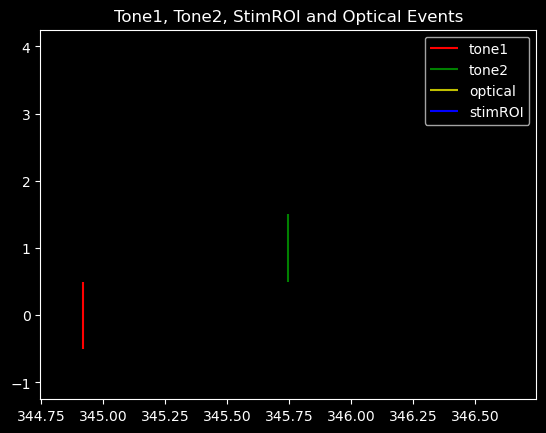

In [57]:
# Check one single event / reach
plt.eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps,optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
plt.xlim(tone2_timestamps[0]-1, tone2_timestamps[0]+1)
plt.legend(['tone1','tone2', 'optical','stimROI'])
plt.title('Tone1, Tone2, StimROI and Optical Events')
plt.show()


## Zoom in on the stimROI TTL and the Optical Pulses to see the latency
- Cell 1: Shows the time between the stimROI and the first optical pulse in that trial
- Cell 2: plots the data

In [63]:
# Select the reach number you want to look att
reach_number = 1

# Normally this will be 10
optical_pulses_per_trial = 5

reach_num = (reach_number-1)
optical_num =  (reach_num*5)+1

reach_num = (reach_number-1)
last_optical_num =  (reach_num*5)+9

print('TTL Indexs (reach number, optical ttl): ',reach_num, optical_num)
print('Actual Timestamp: ',stimROI_timestamps[reach_num],optical_timestamps[optical_num])
print('Difference between TTLs: ',(optical_timestamps[optical_num] - stimROI_timestamps[reach_num]),'\n')

print('TTL Indexs (reach number, last_optical_ttl): ',reach_num, last_optical_num)
print('Actual Timestamp: ',stimROI_timestamps[reach_num],optical_timestamps[last_optical_num])
print('Difference between TTLs: ',(optical_timestamps[last_optical_num] - stimROI_timestamps[reach_num]))

TTL Indexs (reach number, optical ttl):  0 1
Actual Timestamp:  761.0068222070313 761.0168214312555
Difference between TTLs:  0.009999224224202408 

TTL Indexs (reach number, last_optical_ttl):  0 9
Actual Timestamp:  761.0068222070313 761.0568183281521
Difference between TTLs:  0.049996121120784665


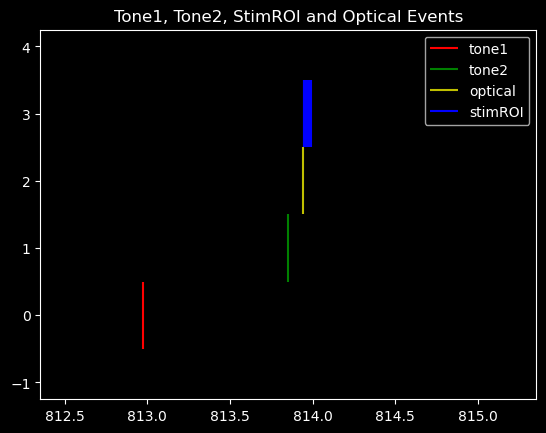

In [86]:
reach_number = 23
# Check one single event / reach
plt.eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps,optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
plt.xlim(tone2_timestamps[reach_number-1]-1.5, tone2_timestamps[reach_number-1]+1.5)
plt.legend(['tone1','tone2', 'optical','stimROI'])
plt.title('Tone1, Tone2, StimROI and Optical Events')
plt.show()


## Look at a zoomed in version of the above plot above to see optical pulses more clearly

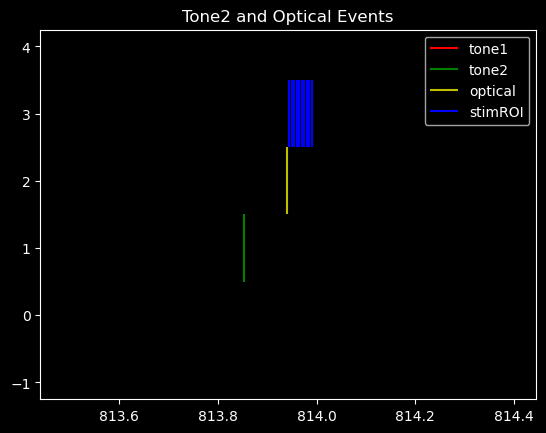

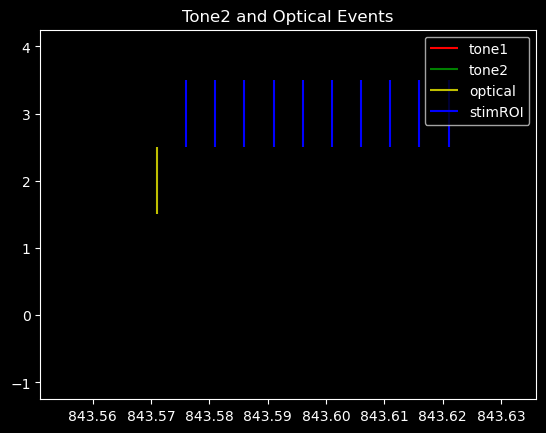

In [87]:
plt.eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps,optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
plt.xlim(stimROI_timestamps[1]-0.5, optical_timestamps[10]+0.5)
plt.legend(['tone1','tone2', 'optical','stimROI'])
plt.title('Tone2 and Optical Events')
plt.show()

plt.eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps,optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
plt.xlim(stimROI_timestamps[2]-0.02, optical_timestamps[20]+0.06)
plt.legend(['tone1','tone2', 'optical','stimROI'])
plt.title('Tone2 and Optical Events')
plt.show()

In [88]:
tone1_timestamps

array([ 292.97580114,  305.82494702,  318.99306831,  331.74919676,
        344.91831618,  359.29451188,  373.64664966,  387.89282043,
        400.99892183,  413.86409967,  427.02118689,  441.66733584,
        457.10951327,  470.31367514,  485.73385457,  498.63996135,
        513.06112863,  533.83733465,  548.53946861,  562.94163748,
        578.39377987,  593.11195753,  606.00609966,  618.91224095,
        632.7783836 ,  645.69052435,  659.59865347,  673.7948041 ,
        687.78299537,  702.20312837,  716.66428214,  730.84246785,
        745.66562701,  760.10978238,  774.26893532,  787.17007704,
        800.26323725,  812.97436978,  827.60650994,  842.00967786,
        858.17286662,  871.10598123,  885.13313562,  897.8223279 ,
        912.09747149,  931.53268219,  946.39187231,  961.01202287,
        975.40218224,  990.00732543, 1004.18851005, 1017.35166507,
       1033.48079812, 1047.86099212, 1062.21812963, 1076.60428939,
       1090.58645596, 1104.76056551, 1118.62876641, 1138.42094

## Create a plot for every reach
- this saves the plots showing the timeing of the events as recorded by the digital board 
- plots are saved too the reach_event_save_path and full_reach_event_save_path (both paths are automatically created at the start of this 01_makeNWB.ipynb file, and should be in the root recording foler)

In [89]:
import pandas as pd
df = pd.DataFrame(T6000_frame)
# df.to_csv (T6000_frame_path, index = None, header=True)

Directory created:  G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\all_reach_events\2_combined_reach_events


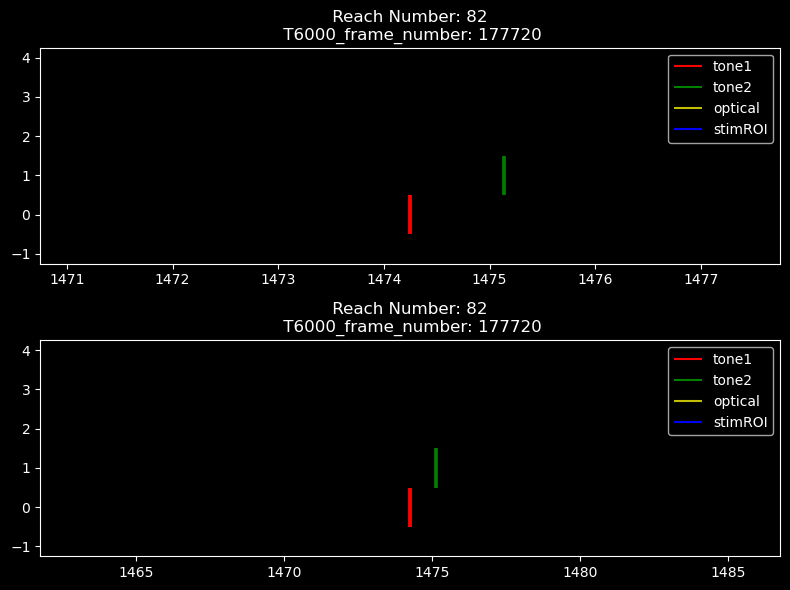

In [90]:
reach_event_save_path_02 = reach_event_save_path + '\\2_combined_reach_events'

if reach_event_save_path_02+f'\\reach_1.png' in glob.glob(reach_event_save_path_02+f'\\reach_*.png'):
    print('Files / plots already exist')
    print('either delete the plots or change the save path')
    
else:
    if not os.path.exists(reach_event_save_path_02):
        os.makedirs(reach_event_save_path_02)
        print('Directory created: ', reach_event_save_path_02)
        
    fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(8,6))

    for i in range(len(tone1_timestamps)):
        
        axs[0].eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps, optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
        axs[0].set_xlim(tone1_timestamps[i]-3.5, tone1_timestamps[i]+3.5)
        axs[0].legend(['tone1','tone2', 'optical','stimROI'])
        axs[0].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        axs[1].eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps, optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
        axs[1].set_xlim(tone1_timestamps[i]-12.5, tone1_timestamps[i]+12.5)
        axs[1].legend(['tone1','tone2', 'optical','stimROI'])
        axs[1].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        plt.tight_layout()

        plt.savefig(reach_event_save_path_02+f'\\reach_{i}.png')

Directory created:  G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\all_reach_events\3_combined_reach_events


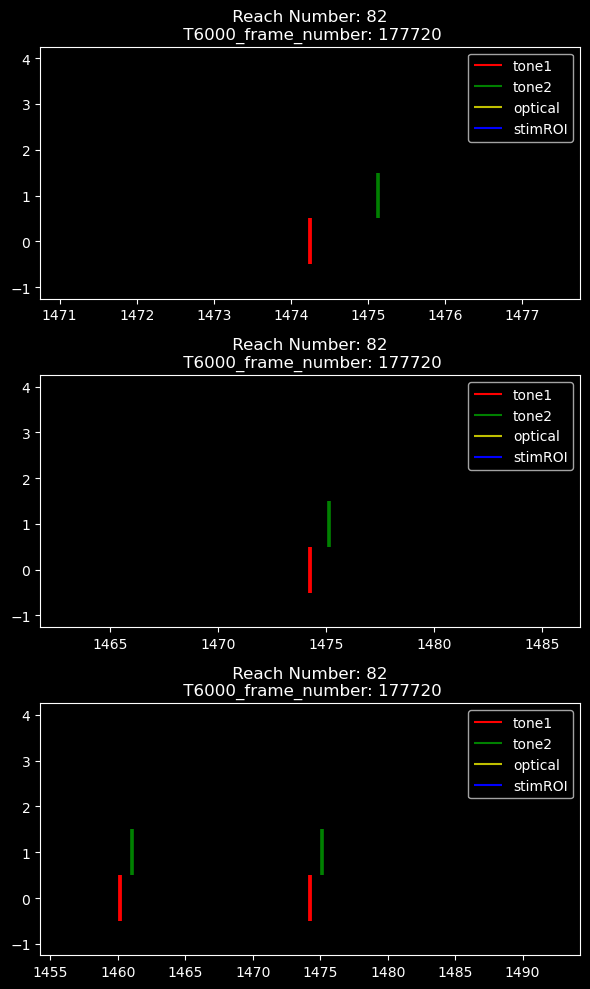

In [91]:
reach_event_save_path_03 = reach_event_save_path + '\\3_combined_reach_events'

if reach_event_save_path_03+f'\\reach_1.png' in glob.glob(reach_event_save_path_03+f'\\reach_*.png'):
    print('Files / plots already exist')
    print('either delete the plots or change the save path')

else:
    if not os.path.exists(reach_event_save_path_03):
        os.makedirs(reach_event_save_path_03)
        print('Directory created: ', reach_event_save_path_03)
    fig, axs = plt.subplots(nrows=3,ncols=1, figsize=(6,10))

    for i in range(len(tone1_timestamps)):
        
        axs[0].eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps, optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
        axs[0].set_xlim(tone1_timestamps[i]-3.5, tone1_timestamps[i]+3.5)
        axs[0].legend(['tone1','tone2', 'optical','stimROI'])
        axs[0].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        axs[1].eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps, optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
        axs[1].set_xlim(tone1_timestamps[i]-12.5, tone1_timestamps[i]+12.5)
        axs[1].legend(['tone1','tone2', 'optical','stimROI'])
        axs[1].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        axs[2].eventplot([tone1_timestamps,tone2_timestamps, stimROI_timestamps, optical_timestamps], orientation='horizontal', colors=['r','g','y','b'])
        axs[2].set_xlim(tone1_timestamps[i]-20, tone1_timestamps[i]+20)
        axs[2].legend(['tone1','tone2', 'optical','stimROI'])
        axs[2].set_title(f' Reach Number: {i+1} \n T6000_frame_number: {T6000_frame[i]}')

        plt.tight_layout()

        plt.savefig(reach_event_save_path_03+f'\\reach_{i}.png')

In [106]:
# if reach_event_save_path+f'\\reach_1.png' in glob.glob(reach_event_save_path+f'\\reach_*.png'):
#     print('Files already exists')
# else:
#     for i in range(len(tone1_timestamps)):
#         plt.eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
#         #plt.xlim(tone1_timestamps[i]-2, tone2_timestamps[i]+2)
#         plt.xlim(tone1_timestamps[i]-2, tone1_timestamps[i]+3)
#         plt.legend(['tone1','tone2', 'optical','stimROI'])
#         plt.title('Tone2 and Optical Events')
#         plt.savefig(reach_event_save_path+f'\\reach_{i}.png')

        
#     for i in range(len(tone1_timestamps)):
#         plt.eventplot([tone1_timestamps, tone2_timestamps, optical_timestamps,stimROI_timestamps], orientation='horizontal', colors=['r', 'g','b','y'])
#         plt.xlim(tone1_timestamps[i]-10, tone2_timestamps[i]+10)
#         plt.legend(['tone1','tone2', 'optical','stimROI'])
#         plt.title('Tone2 and Optical Events')
#         plt.savefig(full_reach_event_save_path+f'\\reach_{i}.png')



## End of plotting 

### using the number of rows recorded in the frame_events dataframe, we can calculate the total number of frames recorded, since each row is equivalent to one frame. we can use this to find total recording duration in seconds

In [107]:
row_numbers = np.arange(1, len(ni_df[ni_df['line'] == 8]) + 1)
open_ephys_frames = row_numbers
frames_in_seconds_open_ephys = np.array(row_numbers) / 150
frames_in_seconds_open_ephys[0:5]


array([0.00666667, 0.01333333, 0.02      , 0.02666667, 0.03333333])

### This shows the number of frames recoded by the camera in the open ephys. because the camera is recording at 150 fps, we can divide the frame number by 150 to get the time in seconds. and because i start the behavior camera and end the behvior camera begins after starting and ending the open ephys recording, there will be time in the open ephys recording before the frames start getting recorded.

In [109]:
open_ephys_frames_count = frame_events.shape[0]
print("number of frames recorded by open ephys:", open_ephys_frames_count)
print('number of frames recorded in txt file / total camera frames:', len(frames))
print('difference between open ephys frames and txt file frames:', len(frame_numbers) - open_ephys_frames_count)
print('')
print('duration of open ephys recording in seconds:', open_ephys_frames_count/150)
print('duration of open ephys recording in minutes:', open_ephys_frames_count/150/60)
print('')
print('duration of camera recording in seconds:', len(frame_numbers)/150)
print('duration of camera recording in minutes:', len(frame_numbers)/150/60)

number of frames recorded by open ephys: 180996
number of frames recorded in txt file / total camera frames: 180912
difference between open ephys frames and txt file frames: -84

duration of open ephys recording in seconds: 1206.64
duration of open ephys recording in minutes: 20.110666666666667

duration of camera recording in seconds: 1206.08
duration of camera recording in minutes: 20.101333333333333


In [110]:
extra_frames_counted_by_open_ephys =  open_ephys_frames_count - txt_file_frame_count
print("number of extra frames recorded by open-ephys:", extra_frames_counted_by_open_ephys)
print("seconds of extra frames recorded by open-ephys", extra_frames_counted_by_open_ephys/150)
print("minutes of extra frames recorded by open-ephys", extra_frames_counted_by_open_ephys/150/60)

number of extra frames recorded by open-ephys: 84
seconds of extra frames recorded by open-ephys 0.56
minutes of extra frames recorded by open-ephys 0.009333333333333334


### use the recorded frame event in the txt file and index into the corrisponding row of the frame_events dataframe and grab the time from the timestamp column. this gived you the aligned time in which the event occured, meaning you can use that time to plot the data, because it is syncronized with the neuropixel clocks

In [111]:
# print("Pellet Detected frame number:", pellet_detected_frame)
# print("Pellet Delivery frame number:", pellet_delivery_frame)

# print('')


# # Create new arrays to store the extracted timestamps
# detected_timestamps = []
# delivery_timestamps = []
# # Iterate through the frames in the 'pellet_detected_frame' array
# for frame in pellet_detected_frame:
#     # Use the frame value as an index to select the corresponding row
#     selected_row = frame_events.iloc[frame]
#     timestamp = selected_row['timestamp']
#     detected_timestamps.append(timestamp)

# # Iterate through the frames in the 'pellet_delivery_frame' array
# for frame in pellet_delivery_frame:
#     # Use the frame value as an index to select the corresponding row
#     selected_row = frame_events.iloc[frame]
#     timestamp = selected_row['timestamp']
#     delivery_timestamps.append(timestamp)

# # Now, 'detected_timestamps' and 'delivery_timestamps' contain the extracted timestamps
# print("Pellet Detected Timestamps:", detected_timestamps)
# print("Pellet Delivery Timestamps:", delivery_timestamps)
# print('total pellet delivery :', len(delivery_timestamps))
# print('total pellet detected :', len(detected_timestamps))



In [112]:
# # Divide each value by 150
# pellet_detected_seconds = [value / 150 for value in pellet_detected_frame_new]
# pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame_new]

# print("pellet_detected_seconds: ", pellet_detected_seconds)
# print("pellet_delivery_seconds: ", pellet_delivery_seconds)

# These are the aligned timestamps of the pellet detected and pellet delivery events
### use these when plotting neural data

In [113]:
# event_times_pellet_detetced = frame_events['timestamp'].iloc[pellet_detected_frame_new]
# print(event_times_pellet_detetced)

# event_times_pellet_delivery = frame_events['timestamp'].iloc[pellet_delivery_frame_new]
# event_times_pellet_delivery

### Plot the digital line inputs

In [114]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

## plot of digital events. Line 8 is the camera frame trigger, line 5 is the tone1 and tone2, line 6 is just tone2, line 4 is the optical pulses

['8, frames', '7, synch', '6, Tone1', '5, tone2', '4, stimROI', '3, Optical Pulses']


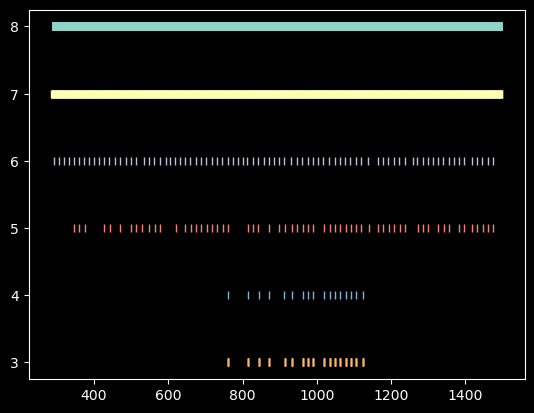

In [119]:
ch_name = ['8, frames', '7, synch', '6, Tone1','5, tone2', '4, stimROI', '3, Optical Pulses']
i=0
for ch in ([8,7,6,5,4,3]):
    # plt.xlim(65,75)
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch_name[i])

    i+=1

show_lengend = False
if show_lengend:
    plt.legend()

print(ch_name)

In [120]:
# Convert the values to float
pellet_detected_frame = [float(frame) for frame in pellet_detected_frame]
pellet_delivery_frame = [float(frame) for frame in pellet_delivery_frame]


In [121]:
# detected_baseline = pellet_detected_seconds[0:2]
# detected_perturbation = pellet_detected_seconds[2:4]
# detected_washout = pellet_detected_seconds[4:6]
# print(detected_baseline, detected_perturbation, detected_washout)

# pellet_detected_slow_motion_baseline = pellet_detected_slow_motion[0:2] 
# pellet_detected_slow_motion_perturbation = pellet_detected_slow_motion[2:4]
# pellet_detected_slow_motion_washout = pellet_detected_slow_motion[4:6]
# print(pellet_detected_slow_motion_baseline, pellet_detected_slow_motion_perturbation, pellet_detected_slow_motion_washout)



In [122]:
# delivery_baseline = pellet_delivery_seconds[0:2]
# delivery_perturbation = pellet_delivery_seconds[2:4]
# delivery_washout = pellet_delivery_seconds[4:6]
# print(delivery_baseline, delivery_perturbation, delivery_washout)

# pellet_delivery_slow_motion_baseline = pellet_delivery_slow_motion[0:2]
# pellet_delivery_slow_motion_perturbation = pellet_delivery_slow_motion[2:4]
# pellet_delivery_slow_motion_washout = pellet_delivery_slow_motion[4:6]
# pellet_delivery_slow_motion_baseline, pellet_delivery_slow_motion_perturbation, pellet_delivery_slow_motion_washout

### Create a dictionary to store the data (this is the detialed option)
- Run this cell if you want the nwb to have all of this data

In [124]:


# stimuli_times = { 'pellet_delivery_seconds_txt': pellet_delivery_seconds,
#                 'pellet_detected_seconds_txt': pellet_detected_seconds,
#                 'pellet_delivery_slow_motion_txt': pellet_delivery_slow_motion,
#                 'pellet_detected_slow_motion_txt': pellet_detected_slow_motion,
#                 'pellet_detected_timestamp': tone1_timestamps,
#                 'pellet_delivery_timestamp': tone2_timestamps,
#                 'frame_events_timestamp': frame_events_timestamp,
#                 # 'pellet_delivery_baseline':delivery_baseline,
#                 # 'pellet_detected_perturbation':detected_perturbation,
#                 # 'pellet_delivery_perturbation':delivery_perturbation,
#                 # 'pellet_detected_washout':detected_washout,
#                 # 'pellet_delivery_washout':delivery_washout,
#                 # 'pellet_detected_slow_motion_baseline':pellet_delivery_slow_motion_baseline,
#                 # 'pellet_detected_slow_motion_perturbation':pellet_delivery_slow_motion_perturbation,
#                 # 'pellet_detected_slow_motion_washout':pellet_delivery_slow_motion_washout,
#                 'all_frames_sideCam_txt':frame_numbers,
#                 'frames_in_seconds_openEphys':frames_in_seconds_open_ephys,

#                   }




### Create a dictionary to store the data (this is the simple option)
- Run this cell if you want the nwb to have less data

In [125]:
stimuli_times_simple = { 'tone1_timestamps': tone1_timestamps,
                'tone2_timestamps': tone2_timestamps,
                'stimROI_timestamps': stimROI_timestamps,
                'frame_events_timestamp': frame_timestamps,
                'all_frames_sideCam_txt':frame_numbers,
                'frames_in_seconds_openEphys':frames_in_seconds_open_ephys,
                'optical_timestamps': optical_timestamps,

                  }

### Conver values to floats, for code to work, idk why

In [126]:
# Convert the 'frames' values to float
# stimuli_times['all_frames_sideCam_txt'] = [float(frame) for frame in stimuli_times['all_frames_sideCam_txt']]


# # Now, the 'frames' values are in float format
# print(stimuli_times['all_frames_sideCam_txt'])

In [127]:
# Convert the 'frames' values to float
stimuli_times_simple['all_frames_sideCam_txt'] = [float(frame) for frame in stimuli_times_simple['all_frames_sideCam_txt']]


# # Now, the 'frames' values are in float format
# print(stimuli_times_simple['all_frames_sideCam_txt'])

In [128]:

#stimulus list
stimuli = {'none': None,
           } 

## Assemble NWB

In [129]:
# !pip install pynwb
# !pip install numpy==1.24.3


In [130]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [131]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

print(experiment_description)

nwbfile = NWBFile(experiment_description, 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Christie Lab',
                  institution='University of Colorado Anschtuz Medical Campus',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

Christie Lab, University of Colorado Anschutz. Reaching C57 Mouse with ChR2-Retro injected in Simplex Lobule, and Fiber Optic Implanted in Pontine Gray to Induce missed reaches.


### add stimulus information
- choose to run either the stimuli_times or stimuli_times_simple cell bellow (you can only run one, and that will decidce whats in your nwb)

In [132]:
# for stim in stimuli_times.keys():
#     nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
#                       np.array(stimuli_times[stim])[-1]+3.,
#                       [stim])

In [133]:
for stim in stimuli_times_simple.keys():
    nwbfile.add_epoch(np.array(stimuli_times_simple[stim])[0], 
                      np.array(stimuli_times_simple[stim])[-1]+3.,
                      [stim])

In [134]:
nwbfile

root pynwb.file.NWBFile at 0x1985692517760
Fields:
  epoch_tags: {
    all_frames_sideCam_txt,
    frame_events_timestamp,
    frames_in_seconds_openEphys,
    optical_timestamps,
    stimROI_timestamps,
    tone1_timestamps,
    tone2_timestamps
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Christie Lab, University of Colorado Anschutz. Reaching C57 Mouse with ChR2-Retro injected in Simplex Lobule, and Fiber Optic Implanted in Pontine Gray to Induce missed reaches.
  experimenter: ['Grant Robert Hughes']
  file_create_date: [datetime.datetime(2025, 11, 11, 13, 1, 30, 611503, tzinfo=tzlocal())]
  identifier: G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40
  institution: University of Colorado Anschtuz Medical Campus
  lab: Christie Lab
  session_description: Christie Lab, University of Colorado Anschutz. Reaching C57 Mouse with ChR2-Retro injected in Simplex Lobule, and Fiber Optic Implanted in Pontine 

## Run for stimuli_times 

In [135]:
### Uncomment for 

In [136]:
# nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')
# #optogenetic pertibation
# nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')
# #arbMatrix and scene flicker
# # nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')
# stim_vals = {'optogenetics_LED_state':-1,
       
# }
        
# stim = 'all_frames_sideCam_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )   
# stim = 'frames_in_seconds_openEphys'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_delivery_seconds_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_detected_seconds_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_delivery_slow_motion_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_detected_slow_motion_txt'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_detected_timestamp'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'pellet_delivery_timestamp'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )
# stim = 'frame_events_timestamp'
# for i,trial_start in enumerate(np.array(stimuli_times[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )

    

In [137]:
nwbfile

root pynwb.file.NWBFile at 0x1985692517760
Fields:
  epoch_tags: {
    all_frames_sideCam_txt,
    frame_events_timestamp,
    frames_in_seconds_openEphys,
    optical_timestamps,
    stimROI_timestamps,
    tone1_timestamps,
    tone2_timestamps
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Christie Lab, University of Colorado Anschutz. Reaching C57 Mouse with ChR2-Retro injected in Simplex Lobule, and Fiber Optic Implanted in Pontine Gray to Induce missed reaches.
  experimenter: ['Grant Robert Hughes']
  file_create_date: [datetime.datetime(2025, 11, 11, 13, 1, 30, 611503, tzinfo=tzlocal())]
  identifier: G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40
  institution: University of Colorado Anschtuz Medical Campus
  lab: Christie Lab
  session_description: Christie Lab, University of Colorado Anschutz. Reaching C57 Mouse with ChR2-Retro injected in Simplex Lobule, and Fiber Optic Implanted in Pontine 

## Run for stimuli_times_simple

In [138]:
len(tone1_timestamps), len(tone2_timestamps), len(frame_timestamps), len(frame_numbers), len(frames_in_seconds_open_ephys)

(82, 61, 180996, 180912, 180996)

In [139]:
nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')

#optogenetic pertibation
nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')


In [140]:

#arbMatrix and scene flicker
# nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')

stim_vals = {'optogenetics_LED_state':-1,
       
}


    
stim = 'tone1_timestamps'
for i, trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                    optogenetics_LED_state=0)
    
stim = 'tone2_timestamps'
for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
stim = 'stimROI_timestamps'
for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )

stim = 'frame_events_timestamp'
total_trials = len(stimuli_times_simple[stim])
for i, trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                      optogenetics_LED_state=0)


stim = 'optical_timestamps'
for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,)

#                      )
# print(f'here 2: {nwbfile.trials}')


# stim = 'all_frames_sideCam_txt'
# for i,trial_start in enumerate(np.array(stimuli_times_simple[stim])):
#     nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
#                      optogenetics_LED_state=0,

#                      )   

## Check the trials dataframe

In [141]:
df = nwbfile.trials.to_dataframe()


In [142]:
df[0:15]

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,292.975801,292.975801,tone1_timestamps,0
1,305.824947,305.824947,tone1_timestamps,0
2,318.993068,318.993068,tone1_timestamps,0
3,331.749197,331.749197,tone1_timestamps,0
4,344.918316,344.918316,tone1_timestamps,0
5,359.294512,359.294512,tone1_timestamps,0
6,373.646650,373.646650,tone1_timestamps,0
7,387.892820,387.892820,tone1_timestamps,0
8,400.998922,400.998922,tone1_timestamps,0


In [143]:

tone1_data = df[df['stimulus'] == 'tone1_timestamps']
tone2_data = df[df['stimulus'] == 'tone2_timestamps']
stimROI_data = df[df['stimulus'] == 'stimROI_timestamps']
pellet_delivery_slow_motion = df[df['stimulus'] == 'pellet_delivery_slow_motion_txt']
pellet_detected_slow_motion = df[df['stimulus'] == 'pellet_detected_slow_motion_txt']
all_frames_sideCam = df[df['stimulus'] == 'all_frames_sideCam_txt']
frames_in_seconds_openEphys = df[df['stimulus'] == 'frames_in_seconds_openEphys']
optical_timestamps = df[df['stimulus'] == 'optical_timestamps']


In [144]:
tone1_data.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,292.975801,292.975801,tone1_timestamps,0
1,305.824947,305.824947,tone1_timestamps,0
2,318.993068,318.993068,tone1_timestamps,0
3,331.749197,331.749197,tone1_timestamps,0
4,344.918316,344.918316,tone1_timestamps,0


In [145]:
tone2_data.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
82,345.747352,345.747352,tone2_timestamps,0
83,360.132547,360.132547,tone2_timestamps,0
84,374.502683,374.502683,tone2_timestamps,0
85,427.852222,427.852222,tone2_timestamps,0
86,442.487372,442.487372,tone2_timestamps,0


In [146]:
stimROI_data.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
143,761.006822,761.006822,stimROI_timestamps,0
144,813.939828,813.939828,stimROI_timestamps,0
145,843.571023,843.571023,stimROI_timestamps,0
146,872.132002,872.132002,stimROI_timestamps,0
147,912.968971,912.968971,stimROI_timestamps,0


In [147]:
all_frames_sideCam.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,


In [148]:
frames_in_seconds_openEphys.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,


In [149]:
optical_timestamps.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
181156,761.011822,761.011822,optical_timestamps,0
181157,761.016821,761.016821,optical_timestamps,0
181158,761.021821,761.021821,optical_timestamps,0
181159,761.026821,761.026821,optical_timestamps,0
181160,761.031820,761.031820,optical_timestamps,0


## add optogenetics

In [150]:
optical_events.head()

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
80384,3,22822994,761.011822,102,9,PXIe-6341,1
80386,3,22823144,761.016821,102,9,PXIe-6341,0
80388,3,22823294,761.021821,102,9,PXIe-6341,1
80391,3,22823444,761.026821,102,9,PXIe-6341,0
80393,3,22823594,761.031820,102,9,PXIe-6341,1


In [151]:

# opto_on_times = delivery_pert_df['start_time'].to_numpy()
# opto_off_times = [value + 0.1 for value in opto_on_times]

# opto_on_times, opto_off_times


In [152]:
# frame_events 

# opto_off_times = detected_pert_df[camera_df.state==0].timestamp
# opto_on_times = camera_df[camera_df.state==1].timestamp

In [153]:
# opto_states = pynwb.epoch.TimeIntervals(
#     name="optogenetics_states",
#     description="intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, ",
# )

# opto_states.add_column(name="power", description="15mW")
# opto_states.add_column(name="wavelength", description="470nm")

# for i in range(np.array(opto_off_times).shape[0]):
#     opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

# nwbfile.add_time_intervals(opto_states)

### add ephys data
first add electrodes and raw data link

In [154]:
# from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data

# This is a deprecated import, as the functions have been removed from dlab.nwbtools
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions # Removed multi_load_unit_data, outdates function

print('this is the deprecated import from dlab.nwbtools --> it will not load or work, only here as a backup')

no Allen Institute NWB API. get this from http://stash.corp.alleninstitute.org/projects/INF/repos/ainwb/browse
no OpenEphys.py get this from https://github.com/open-ephys/analysis-tools
this is the deprecated import from dlab.nwbtools --> it will not load or work, only here as a backup


In [155]:
# df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)
# df_units.iloc[0]

#### This is setting the recording_folder to the correct location for the NWB
- recording_folder needs to include \Record Node 103\experiment1\recording1\continuous to work

In [156]:
recording_folder = root_recording_folder + r"\Record Node 103\experiment1\recording1\continuous"
print(recording_folder)

G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\Record Node 103\experiment1\recording1\continuous


##### The cell bellow needs to print contents for each probe like shown bellow
- Contents: ['Neuropix-PXI-100.ProbeA-AP', 'Neuropix-PXI-100.ProbeA-LFP', 'Neuropix-PXI-100.ProbeB-AP', 'Neuropix-PXI-100.ProbeB-LFP', 'Neuropix-PXI-100.ProbeC', 'Neuropix-PXI-100.ProbeD-AP', 'Neuropix-PXI-100.ProbeD-LFP', 'Neuropix-PXI-100.ProbeE-AP', 'Neuropix-PXI-100.ProbeE-LFP', 'NI-DAQmx-102.PXIe-6341']


In [157]:
import os

# recording_folder = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\Record Node 103\experiment1\recording1\continuous"
print("Looking in:", recording_folder)
print("Contents:", os.listdir(recording_folder))

Looking in: G:\Grant\neuropixels\raw_recordings\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\Record Node 103\experiment1\recording1\continuous
Contents: ['Neuropix-PXI-100.ProbeA', 'Neuropix-PXI-100.ProbeB-AP', 'Neuropix-PXI-100.ProbeB-LFP', 'Neuropix-PXI-100.ProbeC', 'Neuropix-PXI-100.ProbeD', 'Neuropix-PXI-100.ProbeE-AP', 'Neuropix-PXI-100.ProbeE-LFP', 'Neuropix-PXI-100.ProbeF-AP', 'Neuropix-PXI-100.ProbeF-LFP', 'NI-DAQmx-102.PXIe-6341']


# NEED TO UPLOAD .IMRO FILES FOR NP2.0 CONFIGS 
# NEED TO TURN OFF CHANNLES FOR NP1.0 PROBES

## Make layout for NP2-4-shank

### Set the path to the channel configuration files used in the recording

In [158]:
probe_A_ch_configuation_file_path = r"G:\Grant\neuropixels\All_6_Probes_Channel_Configuration_Files\configs_logged_per_recording\reach10\20251110\probe_A_SIM_IP.json"
probe_C_ch_configuation_file_path = r"G:\Grant\neuropixels\All_6_Probes_Channel_Configuration_Files\configs_logged_per_recording\reach10\20251110\probe_C_MoP.json"
probe_D_ch_configuation_file_path = r"G:\Grant\neuropixels\All_6_Probes_Channel_Configuration_Files\configs_logged_per_recording\reach10\20251110\probe_D_VaL.json"

In [160]:

# Check existence and print paths
print("Checking for Configuration files...")
print("probe_A_ch_configuation_file_path:", probe_A_ch_configuation_file_path)
print("probe_C_ch_configuation_file_path:", probe_C_ch_configuation_file_path)
print("probe_D_ch_configuation_file_path:", probe_D_ch_configuation_file_path)


print('')

# File existence checks
if not os.path.exists(probe_A_ch_configuation_file_path):
    raise FileNotFoundError("probe_A_ch_configuation_file_path channel configuration file not found")
if not os.path.exists(probe_C_ch_configuation_file_path):
    raise FileNotFoundError("probe_C_ch_configuation_file_path channel configuration file not found")
if not os.path.exists(probe_D_ch_configuation_file_path):
    raise FileNotFoundError("probe_D_ch_configuation_file_path channel configuration file not found")
else:
    print("✅ All Behavior files found")

Checking for Configuration files...
probe_A_ch_configuation_file_path: G:\Grant\neuropixels\All_6_Probes_Channel_Configuration_Files\configs_logged_per_recording\reach10\20251110\probe_A_SIM_IP.json
probe_C_ch_configuation_file_path: G:\Grant\neuropixels\All_6_Probes_Channel_Configuration_Files\configs_logged_per_recording\reach10\20251110\probe_C_MoP.json
probe_D_ch_configuation_file_path: G:\Grant\neuropixels\All_6_Probes_Channel_Configuration_Files\configs_logged_per_recording\reach10\20251110\probe_D_VaL.json

✅ All Behavior files found


### Load the channel configuration files used in the recording

In [169]:
import json

# Assuming you have a file named 'data.json' with JSON content
# Example 'data.json':
# {
#     "name": "Alice",
#     "age": 30,
#     "city": "New York"
# }

try:
    with open(probe_A_ch_configuation_file_path, 'r') as file:
        probe_A_ch_configuation = json.load(file)
    print("Loaded channel configuration data for probe A (SIM/IP)")
    print(probe_A_ch_configuation)
    probe_A_contact_positions = np.array(data['probes'][0]['contact_positions'])
    print(probe_A_contact_positions.shape)
    print(probe_A_contact_positions[:5])
except FileNotFoundError:
    print("Error: 'data.json' not found.")
except json.JSONDecodeError:
    print("Error: Invalid JSON format in 'data.json'.")
print('')

try:
    with open(probe_C_ch_configuation_file_path, 'r') as file:
        probe_C_ch_configuation = json.load(file)
    print("Loaded channel configuration data for probe C (MoP)")
    print(probe_C_ch_configuation)
    probe_C_contact_positions = np.array(data['probes'][0]['contact_positions'])
    print(probe_C_contact_positions.shape)
    print(probe_C_contact_positions[:5])
except FileNotFoundError:
    print("Error: 'data.json' not found.")
except json.JSONDecodeError:
    print("Error: Invalid JSON format in 'data.json'.")
print('')
try:
    with open(probe_D_ch_configuation_file_path, 'r') as file:
        probe_D_ch_configuation = json.load(file)
    print("Loaded channel configuration data for probe D (VaL)")
    print(probe_D_ch_configuation)
    probe_D_contact_positions = np.array(data['probes'][0]['contact_positions'])
    print(probe_D_contact_positions.shape)
    print(probe_D_contact_positions[:5])
except FileNotFoundError:
    print("Error: 'data.json' not found.")
except json.JSONDecodeError:
    print("Error: Invalid JSON format in 'data.json'.")

Loaded channel configuration data for probe A (SIM/IP)
{'specification': 'probeinterface', 'version': '0.2.23', 'probes': [{'ndim': 2, 'si_units': 'um', 'annotations': {'name': 'Neuropixels 2.0 - Multishank', 'manufacturer': 'imec'}, 'contact_positions': [[27.0, 0.0], [59.0, 0.0], [27.0, 15.0], [59.0, 15.0], [27.0, 30.0], [59.0, 30.0], [27.0, 45.0], [59.0, 45.0], [27.0, 60.0], [59.0, 60.0], [27.0, 75.0], [59.0, 75.0], [27.0, 90.0], [59.0, 90.0], [27.0, 105.0], [59.0, 105.0], [27.0, 120.0], [59.0, 120.0], [27.0, 135.0], [59.0, 135.0], [27.0, 150.0], [59.0, 150.0], [27.0, 165.0], [59.0, 165.0], [27.0, 180.0], [59.0, 180.0], [27.0, 195.0], [59.0, 195.0], [27.0, 210.0], [59.0, 210.0], [27.0, 225.0], [59.0, 225.0], [27.0, 240.0], [59.0, 240.0], [27.0, 255.0], [59.0, 255.0], [27.0, 270.0], [59.0, 270.0], [27.0, 285.0], [59.0, 285.0], [27.0, 300.0], [59.0, 300.0], [27.0, 315.0], [59.0, 315.0], [27.0, 330.0], [59.0, 330.0], [27.0, 345.0], [59.0, 345.0], [27.0, 360.0], [59.0, 360.0], [27.0, 375

In [170]:
# import numpy as np

# # Create empty array for 4-shank layout
# positions = np.zeros((384, 2))

# # Define constants
# col_spacing = 32  # Column spacing in microns
# row_spacing = 15  # Row spacing in microns
# shank_spacing = 250  # Spacing between shanks in microns

# # Shank 1: Channels 47–96
# shank1_start_idx = 46
# for i in range(25):  # 25 rows
#     positions[shank1_start_idx + i, 0] = 0  # Column 1
#     positions[shank1_start_idx + i, 1] = (i + 23) * row_spacing  # Row spacing
#     positions[shank1_start_idx + i + 25, 0] = col_spacing  # Column 2
#     positions[shank1_start_idx + i + 25, 1] = (i + 23) * row_spacing

# # Shank 2: Channels 1–141
# shank2_start_idx = 0
# for i in range(71):  # 71 rows
#     positions[shank2_start_idx + i, 0] = shank_spacing  # Column 1
#     positions[shank2_start_idx + i, 1] = i * row_spacing
#     positions[shank2_start_idx + i + 71, 0] = shank_spacing + col_spacing  # Column 2
#     positions[shank2_start_idx + i + 71, 1] = i * row_spacing

# # Shank 3: Channels 1–141 (same as Shank 2)
# shank3_start_idx = 142
# for i in range(71):  # 71 rows
#     positions[shank3_start_idx + i, 0] = 2 * shank_spacing  # Column 1
#     positions[shank3_start_idx + i, 1] = i * row_spacing
#     positions[shank3_start_idx + i + 71, 0] = 2 * shank_spacing + col_spacing  # Column 2
#     positions[shank3_start_idx + i + 71, 1] = i * row_spacing

# # Shank 4: Channels 47–96 (same as Shank 1)
# shank4_start_idx = 284
# for i in range(25):  # 25 rows
#     positions[shank4_start_idx + i, 0] = 3 * shank_spacing  # Column 1
#     positions[shank4_start_idx + i, 1] = (i + 23) * row_spacing
#     positions[shank4_start_idx + i + 25, 0] = 3 * shank_spacing + col_spacing  # Column 2
#     positions[shank4_start_idx + i + 25, 1] = (i + 23) * row_spacing

# positions


### For some reason running multi_load_unit_data() from dlabs.nwbtools is not working. so i had to copy over the function and run it here. that is what the big cell below is for. ignore it, it just allows the df_units to run undernearh it
### The bellow cell is here because the  multi_load_unit_data() function from dlab.nwbtools is not working
-   its an issue with the units_time.append line, it cant add the amplitudes because of a dimension issue
-   'amplitudes': amplitudes[:,0][spike_clusters==unitID],

In [171]:
# import numpy as np
# import pandas as pd
# import warnings
# import glob, os, h5py, csv
# # from dlab.generalephys import option234_positions
# from dlab.sglx_analysis import readAPMeta
# import dlab.continuous_traces as ct

# option234_positions = np.zeros((384,2))

# try:
# 	from nwb.nwb import NWB
# 	from nwb.nwbts import TimeSeries
# except:
# 	print('no Allen Institute NWB API. get this from http://stash.corp.alleninstitute.org/projects/INF/repos/ainwb/browse')
# try:
# 	from djd.OpenEphys import loadContinuous, loadFolder, load_kwik_klusters
# except:
# 	try:
# 		from OpenEphys import loadContinuous, loadFolder, load_kwik_klusters
# 	except:
# 		print('no OpenEphys.py get this from https://github.com/open-ephys/analysis-tools')

# warnings.simplefilter(action='ignore', category=FutureWarning)
		
# def load_phy_template(path,cluster_file='KS2',site_positions = option234_positions, **kwargs):
# 	"""load spike data that has been manually sorted with the phy-template GUI

#     Parameters
#     ----------
#     path : string
#         the path to the sorted data
#     cluster_file : string, optional
#         the format of the cluter_info file. options, KS2, KS3
#     site_positions : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe

#     Returns
#     -------
#     dict
# 		returns a dictionary of 'good' units, each of which includes:
# 			times: spike times, in seconds
# 			template: template used for matching
# 			ypos: y position on the probe, calculated from the template. requires an accurate site_positions. averages template from 100 spikes.
# 			xpos: x position on the probe, calcualted from the template. requires an accurate site_positions. averages template from 100 spikes.
# 	""" 
# 	clusters = np.load(open(os.path.join(path,'spike_clusters.npy'),'rb'))
# 	spikes = np.load(open(os.path.join(path,'spike_times.npy'),'rb'))
# 	spike_templates = np.load(open(os.path.join(path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(path,'templates.npy'),'rb'))
# 	cluster_id,KSlabel,KSamplitude,KScontamination = [],[],[],[]
# 	[KSlabel.append(row) for row in csv.reader(open(os.path.join(path,'cluster_KSLabel.tsv')))]
# 	[KSamplitude.append(row) for row in csv.reader(open(os.path.join(path,'cluster_Amplitude.tsv')))]
# 	[KScontamination.append(row) for row in csv.reader(open(os.path.join(path,'cluster_ContamPct.tsv')))]
# 	if os.path.isfile(os.path.join(path,'cluster_group.tsv')):
# 		# cluster_id = [row for row in csv.reader(open(os.path.join(path,'cluster_group.tsv')))][1:]
# 		[cluster_id.append(row) for row in csv.reader(open(os.path.join(path,'cluster_group.tsv')))]
# 	else:
# 		if os.path.isfile(os.path.join(path,'cluster_groups.csv')):
# 			# cluster_id = [row for row in csv.reader(open(os.path.join(path,'cluster_groups.csv')))][1:]
# 			[cluster_id.append(row) for row in csv.reader(open(os.path.join(path,'cluster_groups.csv')))]
# 		else: print('cant find cluster groups, either .tsv or .csv')
# 	if 'sampling_rate' in kwargs.keys():
# 		samplingrate = kwargs['sampling_rate']
# 	else:
# 		samplingrate =30000.
# 		# print('no sampling rate specified, using default of 30kHz')
		
# 	units = {}
# 	for i in np.arange(1,np.shape(cluster_id)[0]):
# 		unit = int(cluster_id[i][0].split('\t')[0])
# 		units[str(unit)] = {}
		
# 		#get the unit spike times
# 		units[str(unit)]['samples'] = spikes[np.where(clusters==unit)].flatten()
# 		units[str(unit)]['times'] = spikes[np.where(clusters==unit)]/samplingrate
# 		units[str(unit)]['times'] = units[str(unit)]['times'].flatten()
		
# 		#get the mean template used for this unit
# 		all_templates = spike_templates[np.where(clusters==unit)].flatten()
# 		n_templates_to_subsample = 100
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)
# 		units[str(unit)]['template'] = mean_template
		
# 		#take a weighted average of the site_positions, where the weights is the absolute value of the template for that channel
# 		#this gets us the x and y positions of the unit on the probe.
# 		# print(mean_template.T.shape)
# 		weights = np.zeros(site_positions.shape)
# 		for channel in range(mean_template.T.shape[0]):
# 			weights[channel,:]=np.trapz(np.abs(mean_template.T[channel,:]))
# 		weights = weights/np.max(weights)
# 		low_values_indices = weights < 0.25  # Where values are low,
# 		weights[low_values_indices] = 0      # make the weight 0
# 		(xpos,ypos)=np.average(site_positions,axis=0,weights=weights)
# 		units[str(unit)]['waveform_weights'] = weights
# 		units[str(unit)]['xpos'] = xpos
# 		units[str(unit)]['ypos'] = ypos #- site_positions[-1][1]
# 		units[str(unit)]['label'] =  cluster_id[i][0].split('\t')[1]
# 		units[str(unit)]['KSlabel'] =  KSlabel[i][0].split('\t')[1]
# 		units[str(unit)]['KSamplitude'] =  KSamplitude[i][0].split('\t')[1]
# 		units[str(unit)]['KScontamination'] =  KScontamination[i][0].split('\t')[1]
# 	return units

# def df_from_phy(path,site_positions = option234_positions,**kwargs):
# 	"""load spike data that has been manually sorted with the phy-template GUI

#     Parameters
#     ----------
#     path : string
#         the path to the sorted data
#     cluster_file : string, optional
#         the format of the cluter_info file. options, KS2, KS3
#     site_positions : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe

#     Returns
#     -------
#     pandas DataFrame
# 		returns a DataFrame of 'good' units, each of which includes:
# 	"""
# 	nwb_data = load_phy_template(path,site_positions)
# 	#structures is a dictionary that defines the bounds of the structure e.g.:{'v1':(0,850), 'hpc':(850,2000)}
# 	mouse = [];experiment=[];cell = [];ypos = [];xpos = [];waveform=[];template=[];structure=[];times=[]
# 	index = []; count = 1
# 	nwb_id = [];probe_id=[]
# 	depth=[];#print(list(nwb_data.keys()));print(list(nwb_data['processing'].keys()));
# 	if 'probe' in kwargs.keys():
# 		for probe in list(nwb_data['processing'].keys()):
# 			if 'UnitTimes' in list(nwb_data['processing'][probe].keys()): 
# 				for i,u in enumerate(list(nwb_data['processing'][probe]['UnitTimes'].keys())):
# 					if u != 'unit_list':
# 						nwb_id.append(nwbid)
# 						probe_id.append(probe)
# 						index.append(count);count+=1
# 						mouse.append(str(np.array(nwb_data.get('identifier'))))
# 						experiment.append(1)
# 						cell.append(u)
# 						times.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['times']));# print(list(nwb_data['processing'][probe]['UnitTimes'][u].keys()))
# 						if 'ypos' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							ypos.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['ypos']))
# 							has_ypos = True
# 						else:
# 							ypos.append(None)
# 							has_ypos = False				
# 						if 'depth' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							depth.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['depth']))
# 						else:
# 							if has_ypos:
# 								depth.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['ypos']))
# 							else:
# 								depth.append(None)
# 						if 'xpos' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							xpos.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['xpos']))
# 							has_xpos = True
# 						else:
# 							xpos.append(None)
# 							has_xpos = False
# 						template.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['template']))
# 						waveform.append(get_peak_waveform_from_template(template[-1]))
# 						if not structures == None:
# 							structur = None
# 							for struct, bounds in structures.iteritems():
# 								if ypos[-1] > bounds[0] and ypos[-1]< bounds[1] :
# 									structur=struct
# 						else:
# 							structur = None
# 						structure.append(structur)
# 	df = pd.DataFrame(index=index)
# 	df = df.fillna(np.nan)
# 	df['nwb_id'] = nwb_id
# 	df['mouse'] = mouse
# 	df['experiment'] = experiment
# 	df['probe'] = probe_id
# 	df['structure'] = structure
# 	df['cell'] = cell
# 	df['times'] = times
# 	df['ypos'] = ypos
# 	df['xpos'] = xpos
# 	df['depth'] = depth
# 	df['waveform'] = waveform
# 	df['template'] = template
# 	return df

# def load_unit_data(recording_path, probe_depth = 3840, site_positions = option234_positions, 
#                    probe_name=None, spikes_filename = 'spike_secs.npy', aligned=True, df=True, **kwargs):
# 	"""DEPRECATED
	
# 	"""
	
# 	if probe_name == None: probe_name = recording_path
#     #Get individual folders for each probe
# 	unit_times=[]
# 	if aligned == False:
# 		if 'sampling_rate' in kwargs.keys():
# 			sampRate  = float(kwargs['sampling_rate'])
# 		else:
# 			sampRate=30000
# 		spike_times = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_times.npy')))/sampRate
# 	else:
# 		spike_times = np.ndarray.flatten(np.load(os.path.join(recording_path, spikes_filename)))

# 	cluster_info = pd.read_csv(os.path.join(recording_path, 'cluster_info.tsv'), '\t')
# 	if cluster_info.keys()[0]=='cluster_id':
# 		cluster_info = cluster_info.rename(columns={'cluster_id':'id'})
# 	spike_clusters = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_clusters.npy')))
# 	spike_templates = np.load(open(os.path.join(recording_path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(recording_path,'templates.npy'),'rb'))
# 	amplitudes = np.load(open(os.path.join(recording_path,'amplitudes.npy'),'rb'))
# 	weights = np.zeros(site_positions.shape)
# 	 # Debugging information

#     #Generate Unit Times Table
# 	for index, unitID in enumerate(cluster_info['id'].values):
#         #get mean template used for each unit
# 		all_templates = spike_templates[np.where(spike_clusters==unitID)].flatten()
# 		n_templates_to_subsample = 100
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)

#         #take a weighted average of the site_positions, where the weights is the absolute value of the template for that channel
#         #this gets us the x and y positions of the unit on the probe.
# 		for channel in range(mean_template.T.shape[0]):
# 			weights[channel,:]=np.trapz(np.abs(mean_template.T[channel,:]))
# 		weights = weights/np.max(weights)
# 		low_values_indices = weights < 0.25  # Where values are low,
# 		weights[low_values_indices] = 0      # make the weight 0
# 		(xpos,zpos)=np.average(site_positions,axis=0,weights=weights)

# 		 # Add debugging statements


# 		unit_times.append({'probe':probe_name,
#                            'unit_id': unitID,
#                            'group': cluster_info.group[index],
# #                                'depth':cluster_info.depth[index],
#                            'depth': (zpos-3840)+probe_depth,
#                            'xpos': xpos,
#                            'zpos': zpos,
#                            'no_spikes': cluster_info.n_spikes[index], 
#                            'KSlabel': cluster_info['KSLabel'][index],
#                            'KSamplitude':cluster_info.Amplitude[index],
#                            'KScontamination': cluster_info.ContamPct[index],
#                            'template': mean_template,
#                            'waveform_weights': weights,
#                            #'amplitudes': amplitudes[:,0][spike_clusters==unitID],
#                            'spike_times': spike_times[spike_clusters == unitID],
#                             })
# 	if df == True:        
# 		unit_data = pd.DataFrame(unit_times)
#         #Remove clusters with no associated spike times left over from Phy
# 		for i,j in enumerate(unit_data.spike_times):
# 			if len(unit_data.spike_times[i])==0:
# 				unit_data.spike_times[i]='empty'
# 		unit_times = unit_data[unit_data.spike_times!='empty']
# 		return(unit_times)
# 	else:
# 		return(unit_times)

# def load_unit_data_from_phy(recording_path,chanmap=None,insertion_depth = 3840,insertion_angle = 0):	
# 	"""requires that phy has been run to generate cluster_info.tsv
# 	   searches the folder for the chanmap the KS used, or searches one folder up for it

#     Parameters
#     ----------
#     recording_path : string
#         the path to the sorted data
#     chanmap : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe
#     insertion_depth : int, optional
#         the depth in microns of the insertion
#     insertion_depth : int, optional
#         the angle, away from normal to the brain surface, of the insertion. used in calculating depth from puea

#     Returns
#     -------
#     cluster_info : dict
# 		returns a dictionary of 'good' units
# 	""" 
# 	cluster_info = pd.read_csv(os.path.join(recording_path, 'cluster_info.tsv'), '\t')
# 	if cluster_info.keys()[0]=='cluster_id':
# 		cluster_info = cluster_info.rename(columns={'cluster_id':'id'})
# 	spike_clusters = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_clusters.npy')))
# 	spike_templates = np.load(open(os.path.join(recording_path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(recording_path,'templates.npy'),'rb'))
# 	spike_times = np.load(open(os.path.join(recording_path,'spike_times.npy'),'rb'))
# 	timestamps = np.load(open(os.path.join(recording_path,'timestamps.npy'),'rb'))
# 	spike_secs = timestamps[spike_times.flatten()]

#     #parse spike times for each unit. also get the template so we can use it for waveform shape clustering
# 	times = []
# 	mean_templates = []
# 	for unitID in cluster_info.id.values:
# 		times.append(spike_secs[spike_clusters == unitID])

# 		all_templates = spike_templates[np.where(spike_clusters==unitID)].flatten()
# 		if len(all_templates) > 100:
# 			n_templates_to_subsample = 100
# 		else: n_templates_to_subsample = len(all_templates)
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)
# 		mean_templates.append(mean_template)
# 	cluster_info['times'] = times
# 	cluster_info['template'] = mean_templates
# 	cluster_info['depth_from_pia']=cluster_info.depth.values * -1 + insertion_depth*np.cos(np.deg2rad(insertion_angle))

# 	if chanmap == None:
# 		try:
# 			chanmap = loadmat(glob.glob(os.path.join(recording_path,'*hanMap.mat'))[0])
# 		except:
# 			chanmap = loadmat(glob.glob(os.path.join(os.path.dirname(recording_path),'*hanMap.mat'))[0])

# 	cluster_info['ycoords'] = chanmap['ycoords'].flatten()[cluster_info.ch.values]
# 	cluster_info['xcoords'] = chanmap['xcoords'].flatten()[cluster_info.ch.values]
# 	cluster_info['shank'] = np.floor(cluster_info['xcoords'].values / 205.).astype(int)

# 	return cluster_info

# def make_spike_secs(probe_folder):
# 	"""if a times of spikes, in seconds, have not been calculated (only samples), creates spike_secs.npy

#     Parameters
#     ----------
#     probe_folder : string
#         the path to the  folder containing sorted data and raw data

#     Returns
#     -------
#      None
# 	 saves, the probe_folder input, a new file called spike)secs.npy
# 	""" 

# 	c = np.load(os.path.join(probe_folder,'spike_times.npy'))
# 	try:
# 		a = np.load(os.path.join(probe_folder,'timestamps.npy'))
# 	except:
# 		try:
# 			a = np.load(os.path.join(probe_folder,'new_timestamps','timestamps.npy'))
# 		except: 
# 			try:
# 				print('could not find timestamps.npy, trying to recreate from the sync TTLs for '+probe_folder)
# 				ct.recreate_probe_timestamps_from_TTL(probe_folder)
# 				a = np.load(os.path.join(probe_folder,'new_timestamps','timestamps.npy'))
# 			except: print('could not find timestamps.npy')
# 	try:
# 		spike_secs = a[c.flatten()[np.where(c.flatten()<a.shape[0])]]
# 	except: 
# 		print(np.shape(a))
# 		print(np.shape(c.flatten()))
# 		print(np.shape(c))
# 		print('shape of spike times annd timestamps not compatible, check above and investigate.')
# 	np.save(open(os.path.join(probe_folder,'spike_secs.npy'),'wb'),spike_secs)


# def multi_load_unit_data(recording_folder,probe_names=['A','B','C','D','E'],probe_depths=[3840,3840,3840,3840,3840],NP_type=['NP1','NP1','NP1','NP1','NP1'],spikes_filename = 'spike_secs.npy', aligned=True):
# 	"""requires that phy has been run to generate cluster_info.tsv
# 	   searches the folder for the chanmap the KS used, or searches one folder up for it

#     Parameters
#     ----------
#     recording_folder : string
#         the path to the parent folder containing multiple simultaneous recordings. each folder contains sorted data
# 	probe_names : tuple-like, containing strings
#         the names of the probes in the recording folder
# 	probe_depths : tuple-like, containing ints
#         the depths of insertion of the probes in the recording folder
#     spikes_filename : string, optional
#         the name of the file containg times for each spike. default: 'spike_secs.npy'
#     aligned : bool, optional
#         whether the probes are temporally aligned. default True

#     Returns
#     -------
#      : pandas DataFrame
# 		a DataFrame containing good units from all recordings. also adds a column for probe of origin based on the `probe_names` input
# 	""" 
	
# 	folder_paths = glob.glob(os.path.join(recording_folder,'*imec*'))
# 	print(folder_paths)
# 	if len(folder_paths) > 0: spikes_filename = 'spike_secs.npy'
	
# 	else:
# 		folder_paths = glob.glob(os.path.join(recording_folder,'*AP*'))
# 		if len(folder_paths) > 0: 
# 			for probe_folder in folder_paths: make_spike_secs(probe_folder)
# 		else:
# 			print('did not find any recordings in '+recording_folder+'')
# 			return
# 	return pd.concat([load_unit_data(folder,probe_name=probe_names[i],probe_depth=probe_depths[i],spikes_filename = spikes_filename, aligned=True,df=True) for i,folder in enumerate(folder_paths)],ignore_index=True)






# def multi_load_unit_data_NP2(recording_folder, probe_names=['A', 'B', 'C', 'D', 'E'], 
#                          probe_depths=[3840, 3840, 3840, 3840, 3840], 
#                          NP_type=['NP1', 'NP1', 'NP1', 'NP1', 'NP1'], 
#                          spikes_filename='spike_secs.npy', aligned=True):
#     """
#     Requires that phy has been run to generate cluster_info.tsv.
#     Searches the folder for the chanmap the KS used, or searches one folder up for it.

#     Parameters
#     ----------
#     recording_folder : string
#         The path to the parent folder containing multiple simultaneous recordings. Each folder contains sorted data.
#     probe_names : tuple-like, containing strings
#         The names of the probes in the recording folder.
#     probe_depths : tuple-like, containing ints
#         The depths of insertion of the probes in the recording folder.
#     NP_type : list of strings, optional
#         The Neuropixels type for each probe ('NP1' or 'NP2'). Default is NP1 for all probes.
#     spikes_filename : string, optional
#         The name of the file containing times for each spike. Default: 'spike_secs.npy'.
#     aligned : bool, optional
#         Whether the probes are temporally aligned. Default: True.

#     Returns
#     -------
#     pandas.DataFrame
#         A DataFrame containing good units from all recordings, with an additional column for probe of origin.
#     """
#     def generate_np2_4shank_positions():
#         # Generate the 384x2 layout for NP2-4shank
#         positions = []
#         for shank_idx in range(4):
#             x_offset = shank_idx * 250  # Distance between shanks
#             for row_idx in range(71):  # 71 rows of channels per column for shank 2/3, 25 for shank 1/4
#                 y = row_idx * 15
#                 positions.append([x_offset, y])  # First column
#                 positions.append([x_offset + 32, y])  # Second column
#         return np.array(positions)

#     # Initialize positions for each probe based on NP_type
#     all_positions = []
#     for probe_type in NP_type:
#         if probe_type == 'NP1':
#             all_positions.append(option234_positions)  # Existing NP1 layout
#         elif probe_type == 'NP2':
#             all_positions.append(generate_np2_4shank_positions())
#         else:
#             raise ValueError(f"Unsupported NP_type: {probe_type}")

#     # Locate folders containing recordings
#     folder_paths = glob.glob(os.path.join(recording_folder, '*imec*'))
#     if not folder_paths:
#         folder_paths = glob.glob(os.path.join(recording_folder, '*AP*'))
#         if not folder_paths:
#             print(f"Did not find any recordings in {recording_folder}")
#             return
#         # Generate spike_secs.npy if not already present
#         for probe_folder in folder_paths:
#             make_spike_secs(probe_folder)

#     # Load data for each probe
#     result_dfs = []
#     for i, folder in enumerate(folder_paths):
#         result_dfs.append(load_unit_data(folder, 
#                                          probe_name=probe_names[i], 
#                                          probe_depth=probe_depths[i], 
#                                          site_positions=all_positions[i],
#                                          spikes_filename=spikes_filename, 
#                                          aligned=aligned, 
#                                          df=True))
#     return pd.concat(result_dfs, ignore_index=True)




#### This large uncommented cell is for instances when you had to create global_timestamps.nypy manually
- all the locations where the noraml timestamps.npy file name is used in the code, you will have to replace it with global_timestamps.npy
- therefore, Uncomment this cell bellow if you made a global_timestamps.npy
- AND comment out the large cell bellow it

#### Uncomment this large cell if you had to make gloabal_timestamps.npy
- ie. you timestamps were messed update_display
- in the code block that is uncommented, I replaced all the spots timestamps.npy with global_timestamps.npy 

In [172]:
# import numpy as np
# import pandas as pd
# import warnings
# import glob, os, h5py, csv
# # from dlab.generalephys import option234_positions
# from dlab.sglx_analysis import readAPMeta
# import dlab.continuous_traces as ct

# option234_positions = np.zeros((384,2))

# try:
# 	from nwb.nwb import NWB
# 	from nwb.nwbts import TimeSeries
# except:
# 	print('no Allen Institute NWB API. get this from http://stash.corp.alleninstitute.org/projects/INF/repos/ainwb/browse')
# try:
# 	from djd.OpenEphys import loadContinuous, loadFolder, load_kwik_klusters
# except:
# 	try:
# 		from OpenEphys import loadContinuous, loadFolder, load_kwik_klusters
# 	except:
# 		print('no OpenEphys.py get this from https://github.com/open-ephys/analysis-tools')

# warnings.simplefilter(action='ignore', category=FutureWarning)
		
# def load_phy_template(path,cluster_file='KS2',site_positions = option234_positions, **kwargs):
# 	"""load spike data that has been manually sorted with the phy-template GUI

#     Parameters
#     ----------
#     path : string
#         the path to the sorted data
#     cluster_file : string, optional
#         the format of the cluter_info file. options, KS2, KS3
#     site_positions : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe

#     Returns
#     -------
#     dict
# 		returns a dictionary of 'good' units, each of which includes:
# 			times: spike times, in seconds
# 			template: template used for matching
# 			ypos: y position on the probe, calculated from the template. requires an accurate site_positions. averages template from 100 spikes.
# 			xpos: x position on the probe, calcualted from the template. requires an accurate site_positions. averages template from 100 spikes.
# 	""" 
# 	clusters = np.load(open(os.path.join(path,'spike_clusters.npy'),'rb'))
# 	spikes = np.load(open(os.path.join(path,'spike_times.npy'),'rb'))
# 	spike_templates = np.load(open(os.path.join(path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(path,'templates.npy'),'rb'))
# 	cluster_id,KSlabel,KSamplitude,KScontamination = [],[],[],[]
# 	[KSlabel.append(row) for row in csv.reader(open(os.path.join(path,'cluster_KSLabel.tsv')))]
# 	[KSamplitude.append(row) for row in csv.reader(open(os.path.join(path,'cluster_Amplitude.tsv')))]
# 	[KScontamination.append(row) for row in csv.reader(open(os.path.join(path,'cluster_ContamPct.tsv')))]
# 	if os.path.isfile(os.path.join(path,'cluster_group.tsv')):
# 		# cluster_id = [row for row in csv.reader(open(os.path.join(path,'cluster_group.tsv')))][1:]
# 		[cluster_id.append(row) for row in csv.reader(open(os.path.join(path,'cluster_group.tsv')))]
# 	else:
# 		if os.path.isfile(os.path.join(path,'cluster_groups.csv')):
# 			# cluster_id = [row for row in csv.reader(open(os.path.join(path,'cluster_groups.csv')))][1:]
# 			[cluster_id.append(row) for row in csv.reader(open(os.path.join(path,'cluster_groups.csv')))]
# 		else: print('cant find cluster groups, either .tsv or .csv')
# 	if 'sampling_rate' in kwargs.keys():
# 		samplingrate = kwargs['sampling_rate']
# 	else:
# 		samplingrate =30000.
# 		# print('no sampling rate specified, using default of 30kHz')
		
# 	units = {}
# 	for i in np.arange(1,np.shape(cluster_id)[0]):
# 		unit = int(cluster_id[i][0].split('\t')[0])
# 		units[str(unit)] = {}
		
# 		#get the unit spike times
# 		units[str(unit)]['samples'] = spikes[np.where(clusters==unit)].flatten()
# 		units[str(unit)]['times'] = spikes[np.where(clusters==unit)]/samplingrate
# 		units[str(unit)]['times'] = units[str(unit)]['times'].flatten()
		
# 		#get the mean template used for this unit
# 		all_templates = spike_templates[np.where(clusters==unit)].flatten()
# 		n_templates_to_subsample = 100
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)
# 		units[str(unit)]['template'] = mean_template
		
# 		#take a weighted average of the site_positions, where the weights is the absolute value of the template for that channel
# 		#this gets us the x and y positions of the unit on the probe.
# 		# print(mean_template.T.shape)
# 		weights = np.zeros(site_positions.shape)
# 		for channel in range(mean_template.T.shape[0]):
# 			weights[channel,:]=np.trapz(np.abs(mean_template.T[channel,:]))
# 		weights = weights/np.max(weights)
# 		low_values_indices = weights < 0.25  # Where values are low,
# 		weights[low_values_indices] = 0      # make the weight 0
# 		(xpos,ypos)=np.average(site_positions,axis=0,weights=weights)
# 		units[str(unit)]['waveform_weights'] = weights
# 		units[str(unit)]['xpos'] = xpos
# 		units[str(unit)]['ypos'] = ypos #- site_positions[-1][1]
# 		units[str(unit)]['label'] =  cluster_id[i][0].split('\t')[1]
# 		units[str(unit)]['KSlabel'] =  KSlabel[i][0].split('\t')[1]
# 		units[str(unit)]['KSamplitude'] =  KSamplitude[i][0].split('\t')[1]
# 		units[str(unit)]['KScontamination'] =  KScontamination[i][0].split('\t')[1]
# 	return units

# def df_from_phy(path,site_positions = option234_positions,**kwargs):
# 	"""load spike data that has been manually sorted with the phy-template GUI

#     Parameters
#     ----------
#     path : string
#         the path to the sorted data
#     cluster_file : string, optional
#         the format of the cluter_info file. options, KS2, KS3
#     site_positions : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe

#     Returns
#     -------
#     pandas DataFrame
# 		returns a DataFrame of 'good' units, each of which includes:
# 	"""
# 	nwb_data = load_phy_template(path,site_positions)
# 	#structures is a dictionary that defines the bounds of the structure e.g.:{'v1':(0,850), 'hpc':(850,2000)}
# 	mouse = [];experiment=[];cell = [];ypos = [];xpos = [];waveform=[];template=[];structure=[];times=[]
# 	index = []; count = 1
# 	nwb_id = [];probe_id=[]
# 	depth=[];#print(list(nwb_data.keys()));print(list(nwb_data['processing'].keys()));
# 	if 'probe' in kwargs.keys():
# 		for probe in list(nwb_data['processing'].keys()):
# 			if 'UnitTimes' in list(nwb_data['processing'][probe].keys()): 
# 				for i,u in enumerate(list(nwb_data['processing'][probe]['UnitTimes'].keys())):
# 					if u != 'unit_list':
# 						nwb_id.append(nwbid)
# 						probe_id.append(probe)
# 						index.append(count);count+=1
# 						mouse.append(str(np.array(nwb_data.get('identifier'))))
# 						experiment.append(1)
# 						cell.append(u)
# 						times.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['times']));# print(list(nwb_data['processing'][probe]['UnitTimes'][u].keys()))
# 						if 'ypos' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							ypos.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['ypos']))
# 							has_ypos = True
# 						else:
# 							ypos.append(None)
# 							has_ypos = False				
# 						if 'depth' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							depth.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['depth']))
# 						else:
# 							if has_ypos:
# 								depth.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['ypos']))
# 							else:
# 								depth.append(None)
# 						if 'xpos' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							xpos.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['xpos']))
# 							has_xpos = True
# 						else:
# 							xpos.append(None)
# 							has_xpos = False
# 						template.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['template']))
# 						waveform.append(get_peak_waveform_from_template(template[-1]))
# 						if not structures == None:
# 							structur = None
# 							for struct, bounds in structures.iteritems():
# 								if ypos[-1] > bounds[0] and ypos[-1]< bounds[1] :
# 									structur=struct
# 						else:
# 							structur = None
# 						structure.append(structur)
# 	df = pd.DataFrame(index=index)
# 	df = df.fillna(np.nan)
# 	df['nwb_id'] = nwb_id
# 	df['mouse'] = mouse
# 	df['experiment'] = experiment
# 	df['probe'] = probe_id
# 	df['structure'] = structure
# 	df['cell'] = cell
# 	df['times'] = times
# 	df['ypos'] = ypos
# 	df['xpos'] = xpos
# 	df['depth'] = depth
# 	df['waveform'] = waveform
# 	df['template'] = template
# 	return df

# def load_unit_data(recording_path, probe_depth = 3840, site_positions = option234_positions, 
#                    probe_name=None, spikes_filename = 'spike_secs.npy', aligned=True, df=True, **kwargs):
# 	"""DEPRECATED
	
# 	"""
	
# 	if probe_name == None: probe_name = recording_path
#     #Get individual folders for each probe
# 	unit_times=[]
# 	if aligned == False:
# 		if 'sampling_rate' in kwargs.keys():
# 			sampRate  = float(kwargs['sampling_rate'])
# 		else:
# 			sampRate=30000
# 		spike_times = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_times.npy')))/sampRate
# 	else:
# 		spike_times = np.ndarray.flatten(np.load(os.path.join(recording_path, spikes_filename)))

# 	cluster_info = pd.read_csv(os.path.join(recording_path, 'cluster_info.tsv'), '\t')
# 	if cluster_info.keys()[0]=='cluster_id':
# 		cluster_info = cluster_info.rename(columns={'cluster_id':'id'})
# 	spike_clusters = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_clusters.npy')))
# 	spike_templates = np.load(open(os.path.join(recording_path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(recording_path,'templates.npy'),'rb'))
# 	amplitudes = np.load(open(os.path.join(recording_path,'amplitudes.npy'),'rb'))
# 	weights = np.zeros(site_positions.shape)
# 	 # Debugging information

#     #Generate Unit Times Table
# 	for index, unitID in enumerate(cluster_info['id'].values):
#         #get mean template used for each unit
# 		all_templates = spike_templates[np.where(spike_clusters==unitID)].flatten()
# 		n_templates_to_subsample = 100
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)

#         #take a weighted average of the site_positions, where the weights is the absolute value of the template for that channel
#         #this gets us the x and y positions of the unit on the probe.
# 		for channel in range(mean_template.T.shape[0]):
# 			weights[channel,:]=np.trapz(np.abs(mean_template.T[channel,:]))
# 		weights = weights/np.max(weights)
# 		low_values_indices = weights < 0.25  # Where values are low,
# 		weights[low_values_indices] = 0      # make the weight 0
# 		(xpos,zpos)=np.average(site_positions,axis=0,weights=weights)

# 		 # Add debugging statements


# 		unit_times.append({'probe':probe_name,
#                            'unit_id': unitID,
#                            'group': cluster_info.group[index],
# #                                'depth':cluster_info.depth[index],
#                            'depth': (zpos-3840)+probe_depth,
#                            'xpos': xpos,
#                            'zpos': zpos,
#                            'no_spikes': cluster_info.n_spikes[index], 
#                            'KSlabel': cluster_info['KSLabel'][index],
#                            'KSamplitude':cluster_info.Amplitude[index],
#                            'KScontamination': cluster_info.ContamPct[index],
#                            'template': mean_template,
#                            'waveform_weights': weights,
#                            #'amplitudes': amplitudes[:,0][spike_clusters==unitID],
#                            'spike_times': spike_times[spike_clusters == unitID],
#                             })
# 	if df == True:        
# 		unit_data = pd.DataFrame(unit_times)
#         #Remove clusters with no associated spike times left over from Phy
# 		for i,j in enumerate(unit_data.spike_times):
# 			if len(unit_data.spike_times[i])==0:
# 				unit_data.spike_times[i]='empty'
# 		unit_times = unit_data[unit_data.spike_times!='empty']
# 		return(unit_times)
# 	else:
# 		return(unit_times)

# def load_unit_data_from_phy(recording_path,chanmap=None,insertion_depth = 3840,insertion_angle = 0):	
# 	"""requires that phy has been run to generate cluster_info.tsv
# 	   searches the folder for the chanmap the KS used, or searches one folder up for it

#     Parameters
#     ----------
#     recording_path : string
#         the path to the sorted data
#     chanmap : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe
#     insertion_depth : int, optional
#         the depth in microns of the insertion
#     insertion_depth : int, optional
#         the angle, away from normal to the brain surface, of the insertion. used in calculating depth from puea

#     Returns
#     -------
#     cluster_info : dict
# 		returns a dictionary of 'good' units
# 	""" 
# 	cluster_info = pd.read_csv(os.path.join(recording_path, 'cluster_info.tsv'), '\t')
# 	if cluster_info.keys()[0]=='cluster_id':
# 		cluster_info = cluster_info.rename(columns={'cluster_id':'id'})
# 	spike_clusters = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_clusters.npy')))
# 	spike_templates = np.load(open(os.path.join(recording_path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(recording_path,'templates.npy'),'rb'))
# 	spike_times = np.load(open(os.path.join(recording_path,'spike_times.npy'),'rb'))
# 	timestamps = np.load(open(os.path.join(recording_path,'global_timestamps.npy'),'rb'))
# 	spike_secs = timestamps[spike_times.flatten()]

#     #parse spike times for each unit. also get the template so we can use it for waveform shape clustering
# 	times = []
# 	mean_templates = []
# 	for unitID in cluster_info.id.values:

# 		all_templates = spike_templates[np.where(spike_clusters==unitID)].flatten()
# 		if len(all_templates) > 100:
# 			n_templates_to_subsample = 100
# 		else: n_templates_to_subsample = len(all_templates)
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)
# 		mean_templates.append(mean_template)
# 	cluster_info['times'] = times
# 	cluster_info['template'] = mean_templates
# 	cluster_info['depth_from_pia']=cluster_info.depth.values * -1 + insertion_depth*np.cos(np.deg2rad(insertion_angle))

# 	if chanmap == None:
# 		try:
# 			chanmap = loadmat(glob.glob(os.path.join(recording_path,'*hanMap.mat'))[0])
# 		except:
# 			chanmap = loadmat(glob.glob(os.path.join(os.path.dirname(recording_path),'*hanMap.mat'))[0])

# 	cluster_info['ycoords'] = chanmap['ycoords'].flatten()[cluster_info.ch.values]
# 	cluster_info['xcoords'] = chanmap['xcoords'].flatten()[cluster_info.ch.values]
# 	cluster_info['shank'] = np.floor(cluster_info['xcoords'].values / 205.).astype(int)

# 	return cluster_info

# def make_spike_secs(probe_folder):
# 	"""if a times of spikes, in seconds, have not been calculated (only samples), creates spike_secs.npy

#     Parameters
#     ----------
#     probe_folder : string
#         the path to the  folder containing sorted data and raw data

#     Returns
#     -------
#      None
# 	 saves, the probe_folder input, a new file called spike)secs.npy
# 	""" 

# 	c = np.load(os.path.join(probe_folder,'spike_times.npy'))
# 	try:
# 		a = np.load(os.path.join(probe_folder,'global_timestamps.npy'))
# 	except:
# 		try:
# 			a = np.load(os.path.join(probe_folder,'new_timestamps','global_timestamps.npy'))
# 		except: 
# 			try:
# 				print('could not find global_timestamps.npy, trying to recreate from the sync TTLs for '+probe_folder)
# 				ct.recreate_probe_timestamps_from_TTL(probe_folder)
# 				a = np.load(os.path.join(probe_folder,'new_timestamps','global_timestamps.npy'))
# 			except: print('could not find global_timestamps.npy')
# 	try:
# 		spike_secs = a[c.flatten()[np.where(c.flatten()<a.shape[0])]]
# 	except: 
# 		print(np.shape(a))
# 		print(np.shape(c.flatten()))
# 		print(np.shape(c))
# 		print('shape of spike times annd global_timestamps not compatible, check above and investigate.')
# 	np.save(open(os.path.join(probe_folder,'spike_secs.npy'),'wb'),spike_secs)


# def multi_load_unit_data(recording_folder,probe_names=['A','B','C','D','E'],probe_depths=[3840,3840,3840,3840,3840],NP_type=['NP1','NP1','NP1','NP1','NP1'],spikes_filename = 'spike_secs.npy', aligned=True):
# 	"""requires that phy has been run to generate cluster_info.tsv
# 	   searches the folder for the chanmap the KS used, or searches one folder up for it

#     Parameters
#     ----------
#     recording_folder : string
#         the path to the parent folder containing multiple simultaneous recordings. each folder contains sorted data
# 	probe_names : tuple-like, containing strings
#         the names of the probes in the recording folder
# 	probe_depths : tuple-like, containing ints
#         the depths of insertion of the probes in the recording folder
#     spikes_filename : string, optional
#         the name of the file containg times for each spike. default: 'spike_secs.npy'
#     aligned : bool, optional
#         whether the probes are temporally aligned. default True

#     Returns
#     -------
#      : pandas DataFrame
# 		a DataFrame containing good units from all recordings. also adds a column for probe of origin based on the `probe_names` input
# 	""" 
	
# 	folder_paths = glob.glob(os.path.join(recording_folder,'*imec*'))
# 	print(folder_paths)
# 	if len(folder_paths) > 0: spikes_filename = 'spike_secs.npy'
	
# 	else:
# 		folder_paths = glob.glob(os.path.join(recording_folder,'*AP*'))
# 		if len(folder_paths) > 0: 
# 			for probe_folder in folder_paths: make_spike_secs(probe_folder)
# 		else:
# 			print('did not find any recordings in '+recording_folder+'')
# 			return
# 	return pd.concat([load_unit_data(folder,probe_name=probe_names[i],probe_depth=probe_depths[i],spikes_filename = spikes_filename, aligned=True,df=True) for i,folder in enumerate(folder_paths)],ignore_index=True)




### Use this cell if you did NOT have to create a global_timestamps.npy file
- ie. your recording was normal and you have a timestamps.npy file
- this is simply a direct copy from dlab with no edits
- If you had to create a global_timestamps.npy file, then you need to run the large cell above that is currently uncommented, and NOT run the cell bellow this


In [173]:
# import numpy as np
# import pandas as pd
# import warnings
# import glob, os, h5py, csv
# # from dlab.generalephys import option234_positions
# from dlab.sglx_analysis import readAPMeta
# import dlab.continuous_traces as ct

# option234_positions = np.zeros((384,2))

# try:
# 	from nwb.nwb import NWB
# 	from nwb.nwbts import TimeSeries
# except:
# 	print('no Allen Institute NWB API. get this from http://stash.corp.alleninstitute.org/projects/INF/repos/ainwb/browse')
# try:
# 	from djd.OpenEphys import loadContinuous, loadFolder, load_kwik_klusters
# except:
# 	try:
# 		from OpenEphys import loadContinuous, loadFolder, load_kwik_klusters
# 	except:
# 		print('no OpenEphys.py get this from https://github.com/open-ephys/analysis-tools')

# warnings.simplefilter(action='ignore', category=FutureWarning)
		
# def load_phy_template(path,cluster_file='KS2',site_positions = option234_positions, **kwargs):
# 	"""load spike data that has been manually sorted with the phy-template GUI

#     Parameters
#     ----------
#     path : string
#         the path to the sorted data
#     cluster_file : string, optional
#         the format of the cluter_info file. options, KS2, KS3
#     site_positions : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe

#     Returns
#     -------
#     dict
# 		returns a dictionary of 'good' units, each of which includes:
# 			times: spike times, in seconds
# 			template: template used for matching
# 			ypos: y position on the probe, calculated from the template. requires an accurate site_positions. averages template from 100 spikes.
# 			xpos: x position on the probe, calcualted from the template. requires an accurate site_positions. averages template from 100 spikes.
# 	""" 
# 	clusters = np.load(open(os.path.join(path,'spike_clusters.npy'),'rb'))
# 	spikes = np.load(open(os.path.join(path,'spike_times.npy'),'rb'))
# 	spike_templates = np.load(open(os.path.join(path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(path,'templates.npy'),'rb'))
# 	cluster_id,KSlabel,KSamplitude,KScontamination = [],[],[],[]
# 	[KSlabel.append(row) for row in csv.reader(open(os.path.join(path,'cluster_KSLabel.tsv')))]
# 	[KSamplitude.append(row) for row in csv.reader(open(os.path.join(path,'cluster_Amplitude.tsv')))]
# 	[KScontamination.append(row) for row in csv.reader(open(os.path.join(path,'cluster_ContamPct.tsv')))]
# 	if os.path.isfile(os.path.join(path,'cluster_group.tsv')):
# 		# cluster_id = [row for row in csv.reader(open(os.path.join(path,'cluster_group.tsv')))][1:]
# 		[cluster_id.append(row) for row in csv.reader(open(os.path.join(path,'cluster_group.tsv')))]
# 	else:
# 		if os.path.isfile(os.path.join(path,'cluster_groups.csv')):
# 			# cluster_id = [row for row in csv.reader(open(os.path.join(path,'cluster_groups.csv')))][1:]
# 			[cluster_id.append(row) for row in csv.reader(open(os.path.join(path,'cluster_groups.csv')))]
# 		else: print('cant find cluster groups, either .tsv or .csv')
# 	if 'sampling_rate' in kwargs.keys():
# 		samplingrate = kwargs['sampling_rate']
# 	else:
# 		samplingrate =30000.
# 		# print('no sampling rate specified, using default of 30kHz')
		
# 	units = {}
# 	for i in np.arange(1,np.shape(cluster_id)[0]):
# 		unit = int(cluster_id[i][0].split('\t')[0])
# 		units[str(unit)] = {}
		
# 		#get the unit spike times
# 		units[str(unit)]['samples'] = spikes[np.where(clusters==unit)].flatten()
# 		units[str(unit)]['times'] = spikes[np.where(clusters==unit)]/samplingrate
# 		units[str(unit)]['times'] = units[str(unit)]['times'].flatten()
		
# 		#get the mean template used for this unit
# 		all_templates = spike_templates[np.where(clusters==unit)].flatten()
# 		n_templates_to_subsample = 100
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)
# 		units[str(unit)]['template'] = mean_template
		
# 		#take a weighted average of the site_positions, where the weights is the absolute value of the template for that channel
# 		#this gets us the x and y positions of the unit on the probe.
# 		# print(mean_template.T.shape)
# 		weights = np.zeros(site_positions.shape)
# 		for channel in range(mean_template.T.shape[0]):
# 			weights[channel,:]=np.trapz(np.abs(mean_template.T[channel,:]))
# 		weights = weights/np.max(weights)
# 		low_values_indices = weights < 0.25  # Where values are low,
# 		weights[low_values_indices] = 0      # make the weight 0
# 		(xpos,ypos)=np.average(site_positions,axis=0,weights=weights)
# 		units[str(unit)]['waveform_weights'] = weights
# 		units[str(unit)]['xpos'] = xpos
# 		units[str(unit)]['ypos'] = ypos #- site_positions[-1][1]
# 		units[str(unit)]['label'] =  cluster_id[i][0].split('\t')[1]
# 		units[str(unit)]['KSlabel'] =  KSlabel[i][0].split('\t')[1]
# 		units[str(unit)]['KSamplitude'] =  KSamplitude[i][0].split('\t')[1]
# 		units[str(unit)]['KScontamination'] =  KScontamination[i][0].split('\t')[1]
# 	return units

# def df_from_phy(path,site_positions = option234_positions,**kwargs):
# 	"""load spike data that has been manually sorted with the phy-template GUI

#     Parameters
#     ----------
#     path : string
#         the path to the sorted data
#     cluster_file : string, optional
#         the format of the cluter_info file. options, KS2, KS3
#     site_positions : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe

#     Returns
#     -------
#     pandas DataFrame
# 		returns a DataFrame of 'good' units, each of which includes:
# 	"""
# 	nwb_data = load_phy_template(path,site_positions)
# 	#structures is a dictionary that defines the bounds of the structure e.g.:{'v1':(0,850), 'hpc':(850,2000)}
# 	mouse = [];experiment=[];cell = [];ypos = [];xpos = [];waveform=[];template=[];structure=[];times=[]
# 	index = []; count = 1
# 	nwb_id = [];probe_id=[]
# 	depth=[];#print(list(nwb_data.keys()));print(list(nwb_data['processing'].keys()));
# 	if 'probe' in kwargs.keys():
# 		for probe in list(nwb_data['processing'].keys()):
# 			if 'UnitTimes' in list(nwb_data['processing'][probe].keys()): 
# 				for i,u in enumerate(list(nwb_data['processing'][probe]['UnitTimes'].keys())):
# 					if u != 'unit_list':
# 						nwb_id.append(nwbid)
# 						probe_id.append(probe)
# 						index.append(count);count+=1
# 						mouse.append(str(np.array(nwb_data.get('identifier'))))
# 						experiment.append(1)
# 						cell.append(u)
# 						times.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['times']));# print(list(nwb_data['processing'][probe]['UnitTimes'][u].keys()))
# 						if 'ypos' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							ypos.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['ypos']))
# 							has_ypos = True
# 						else:
# 							ypos.append(None)
# 							has_ypos = False				
# 						if 'depth' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							depth.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['depth']))
# 						else:
# 							if has_ypos:
# 								depth.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['ypos']))
# 							else:
# 								depth.append(None)
# 						if 'xpos' in list(nwb_data['processing'][probe]['UnitTimes'][u].keys()):
# 							xpos.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['xpos']))
# 							has_xpos = True
# 						else:
# 							xpos.append(None)
# 							has_xpos = False
# 						template.append(np.array(nwb_data['processing'][probe]['UnitTimes'][u]['template']))
# 						waveform.append(get_peak_waveform_from_template(template[-1]))
# 						if not structures == None:
# 							structur = None
# 							for struct, bounds in structures.iteritems():
# 								if ypos[-1] > bounds[0] and ypos[-1]< bounds[1] :
# 									structur=struct
# 						else:
# 							structur = None
# 						structure.append(structur)
# 	df = pd.DataFrame(index=index)
# 	df = df.fillna(np.nan)
# 	df['nwb_id'] = nwb_id
# 	df['mouse'] = mouse
# 	df['experiment'] = experiment
# 	df['probe'] = probe_id
# 	df['structure'] = structure
# 	df['cell'] = cell
# 	df['times'] = times
# 	df['ypos'] = ypos
# 	df['xpos'] = xpos
# 	df['depth'] = depth
# 	df['waveform'] = waveform
# 	df['template'] = template
# 	return df

# def load_unit_data(recording_path, probe_depth = 3840, site_positions = option234_positions, 
#                    probe_name=None, spikes_filename = 'spike_secs.npy', aligned=True, df=True, **kwargs):
# 	"""DEPRECATED
	
# 	"""
	
# 	if probe_name == None: probe_name = recording_path
#     #Get individual folders for each probe
# 	unit_times=[]
# 	if aligned == False:
# 		if 'sampling_rate' in kwargs.keys():
# 			sampRate  = float(kwargs['sampling_rate'])
# 		else:
# 			sampRate=30000
# 		spike_times = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_times.npy')))/sampRate
# 	else:
# 		spike_times = np.ndarray.flatten(np.load(os.path.join(recording_path, spikes_filename)))

# 	cluster_info = pd.read_csv(os.path.join(recording_path, 'cluster_info.tsv'), '\t')
# 	if cluster_info.keys()[0]=='cluster_id':
# 		cluster_info = cluster_info.rename(columns={'cluster_id':'id'})
# 	spike_clusters = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_clusters.npy')))
# 	spike_templates = np.load(open(os.path.join(recording_path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(recording_path,'templates.npy'),'rb'))
# 	amplitudes = np.load(open(os.path.join(recording_path,'amplitudes.npy'),'rb'))
# 	weights = np.zeros(site_positions.shape)
# 	 # Debugging information

#     #Generate Unit Times Table
# 	for index, unitID in enumerate(cluster_info['id'].values):
#         #get mean template used for each unit
# 		all_templates = spike_templates[np.where(spike_clusters==unitID)].flatten()
# 		n_templates_to_subsample = 100
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)

#         #take a weighted average of the site_positions, where the weights is the absolute value of the template for that channel
#         #this gets us the x and y positions of the unit on the probe.
# 		for channel in range(mean_template.T.shape[0]):
# 			weights[channel,:]=np.trapz(np.abs(mean_template.T[channel,:]))
# 		weights = weights/np.max(weights)
# 		low_values_indices = weights < 0.25  # Where values are low,
# 		weights[low_values_indices] = 0      # make the weight 0
# 		(xpos,zpos)=np.average(site_positions,axis=0,weights=weights)

# 		 # Add debugging statements


# 		unit_times.append({'probe':probe_name,
#                            'unit_id': unitID,
#                            'group': cluster_info.group[index],
# #                                'depth':cluster_info.depth[index],
#                            'depth': (zpos-3840)+probe_depth,
#                            'xpos': xpos,
#                            'zpos': zpos,
#                            'no_spikes': cluster_info.n_spikes[index], 
#                            'KSlabel': cluster_info['KSLabel'][index],
#                            'KSamplitude':cluster_info.Amplitude[index],
#                            'KScontamination': cluster_info.ContamPct[index],
#                            'template': mean_template,
#                            'waveform_weights': weights,
#                            #'amplitudes': amplitudes[:,0][spike_clusters==unitID],
#                            'spike_times': spike_times[spike_clusters == unitID],
#                             })
# 	if df == True:        
# 		unit_data = pd.DataFrame(unit_times)
#         #Remove clusters with no associated spike times left over from Phy
# 		for i,j in enumerate(unit_data.spike_times):
# 			if len(unit_data.spike_times[i])==0:
# 				unit_data.spike_times[i]='empty'
# 		unit_times = unit_data[unit_data.spike_times!='empty']
# 		return(unit_times)
# 	else:
# 		return(unit_times)

# def load_unit_data_from_phy(recording_path,chanmap=None,insertion_depth = 3840,insertion_angle = 0):	
# 	"""requires that phy has been run to generate cluster_info.tsv
# 	   searches the folder for the chanmap the KS used, or searches one folder up for it

#     Parameters
#     ----------
#     recording_path : string
#         the path to the sorted data
#     chanmap : np.array, optional
#         the geometry of the sites on the array. n x 2, where n is the number of channels. the site_positions should contain coordinates of the channels in probe space. for example, in um on the face of the probe
#     insertion_depth : int, optional
#         the depth in microns of the insertion
#     insertion_depth : int, optional
#         the angle, away from normal to the brain surface, of the insertion. used in calculating depth from puea

#     Returns
#     -------
#     cluster_info : dict
# 		returns a dictionary of 'good' units
# 	""" 
# 	cluster_info = pd.read_csv(os.path.join(recording_path, 'cluster_info.tsv'), '\t')
# 	if cluster_info.keys()[0]=='cluster_id':
# 		cluster_info = cluster_info.rename(columns={'cluster_id':'id'})
# 	spike_clusters = np.ndarray.flatten(np.load(os.path.join(recording_path, 'spike_clusters.npy')))
# 	spike_templates = np.load(open(os.path.join(recording_path,'spike_templates.npy'),'rb'))
# 	templates = np.load(open(os.path.join(recording_path,'templates.npy'),'rb'))
# 	spike_times = np.load(open(os.path.join(recording_path,'spike_times.npy'),'rb'))
# 	timestamps = np.load(open(os.path.join(recording_path,'timestamps.npy'),'rb'))
# 	spike_secs = timestamps[spike_times.flatten()]

#     #parse spike times for each unit. also get the template so we can use it for waveform shape clustering
# 	times = []
# 	mean_templates = []
# 	for unitID in cluster_info.id.values:

# 		all_templates = spike_templates[np.where(spike_clusters==unitID)].flatten()
# 		if len(all_templates) > 100:
# 			n_templates_to_subsample = 100
# 		else: n_templates_to_subsample = len(all_templates)
# 		random_subsample_of_templates = templates[all_templates[np.array(np.random.rand(n_templates_to_subsample)*all_templates.shape[0]).astype(int)]]
# 		mean_template = np.mean(random_subsample_of_templates,axis=0)
# 		mean_templates.append(mean_template)
# 	cluster_info['times'] = times
# 	cluster_info['template'] = mean_templates
# 	cluster_info['depth_from_pia']=cluster_info.depth.values * -1 + insertion_depth*np.cos(np.deg2rad(insertion_angle))

# 	if chanmap == None:
# 		try:
# 			chanmap = loadmat(glob.glob(os.path.join(recording_path,'*hanMap.mat'))[0])
# 		except:
# 			chanmap = loadmat(glob.glob(os.path.join(os.path.dirname(recording_path),'*hanMap.mat'))[0])

# 	cluster_info['ycoords'] = chanmap['ycoords'].flatten()[cluster_info.ch.values]
# 	cluster_info['xcoords'] = chanmap['xcoords'].flatten()[cluster_info.ch.values]
# 	cluster_info['shank'] = np.floor(cluster_info['xcoords'].values / 205.).astype(int)

# 	return cluster_info

# def make_spike_secs(probe_folder):
# 	"""if a times of spikes, in seconds, have not been calculated (only samples), creates spike_secs.npy

#     Parameters
#     ----------
#     probe_folder : string
#         the path to the  folder containing sorted data and raw data

#     Returns
#     -------
#      None
# 	 saves, the probe_folder input, a new file called spike)secs.npy
# 	""" 

# 	c = np.load(os.path.join(probe_folder,'spike_times.npy'))
# 	try:
# 		a = np.load(os.path.join(probe_folder,'timestamps.npy'))
# 	except:
# 		try:
# 			a = np.load(os.path.join(probe_folder,'new_timestamps','timestamps.npy'))
# 		except: 
# 			try:
# 				print('could not find timestamps.npy, trying to recreate from the sync TTLs for '+probe_folder)
# 				ct.recreate_probe_timestamps_from_TTL(probe_folder)
# 				a = np.load(os.path.join(probe_folder,'new_timestamps','timestamps.npy'))
# 			except: print('could not find timestamps.npy')
# 	try:
# 		spike_secs = a[c.flatten()[np.where(c.flatten()<a.shape[0])]]
# 	except: 
# 		print(np.shape(a))
# 		print(np.shape(c.flatten()))
# 		print(np.shape(c))
# 		print('shape of spike times annd global_timestamps not compatible, check above and investigate.')
# 	np.save(open(os.path.join(probe_folder,'spike_secs.npy'),'wb'),spike_secs)


# def multi_load_unit_data(recording_folder,probe_names=['A','B','C','D','E'],probe_depths=[3840,3840,3840,3840,3840],NP_type=['NP1','NP1','NP1','NP1','NP1'],spikes_filename = 'spike_secs.npy', aligned=True):
# 	"""requires that phy has been run to generate cluster_info.tsv
# 	   searches the folder for the chanmap the KS used, or searches one folder up for it

#     Parameters
#     ----------
#     recording_folder : string
#         the path to the parent folder containing multiple simultaneous recordings. each folder contains sorted data
# 	probe_names : tuple-like, containing strings
#         the names of the probes in the recording folder
# 	probe_depths : tuple-like, containing ints
#         the depths of insertion of the probes in the recording folder
#     spikes_filename : string, optional
#         the name of the file containg times for each spike. default: 'spike_secs.npy'
#     aligned : bool, optional
#         whether the probes are temporally aligned. default True

#     Returns
#     -------
#      : pandas DataFrame
# 		a DataFrame containing good units from all recordings. also adds a column for probe of origin based on the `probe_names` input
# 	""" 
	
# 	folder_paths = glob.glob(os.path.join(recording_folder,'*imec*'))
# 	print(f'folder_paths 01: {folder_paths}')

# 	if len(folder_paths) > 0: spikes_filename = 'spike_secs.npy'

# 	else:
# 		folder_paths = glob.glob(os.path.join(recording_folder,'*AP*'))
# 		print(f'folder_paths 02: {folder_paths}')
# 		if len(folder_paths) > 0: 
# 			for probe_folder in folder_paths: make_spike_secs(probe_folder)
# 			print(f'probe_folder: {probe_folder}')
# 		else:
# 			print('did not find any recordings in '+recording_folder+'')
# 			return
# 	return pd.concat([load_unit_data(folder,probe_name=probe_names[i],probe_depth=probe_depths[i],spikes_filename = spikes_filename, aligned=True,df=True) for i,folder in enumerate(folder_paths)],ignore_index=True)




#### Getting spike times if you had to use global_timestamps
- if you did not make global_timestamps.npy, ignore the commentewd out cells bellow 

In [174]:
# spike_times_path = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA-AP\global_timestamps.npy"
# spike_times = np.load(spike_times_path)
# spike_times.shape


In [175]:
# spike_times

## multi_load_unit_data() Function is degraded and should not be used.--> refer to the new **unit_data = UnitData(recording_path)** as seen in 4 cells bellow

###### df_units_2 is a backup way to make the df_units
- it uses the outdated function `multi_load_unit_data` to load the unit data
- to use it you need to uncomment one of the HUGE cells above that contain the function `multi_load_unit_data` (there is one for normal timestamps.npy and one for global_timestamps.npy)
- that large cell is a direct copy from dlab, and im using it again due to the error when importing dlab
###### POSSIBLE ERROS when running multi_load_unit_data() 
1. if cluster_info.tsv is not present in the folder (you need to run phy first, and do at lewast one manual annotation and save)

In [240]:
# This cell is degraded and should not be used.--> refer to the new **unit_data = UnitData(recording_path)** as seen in 4 cells bellow
 
# df_units_2 = multi_load_unit_data(recording_folder,probe_names=probe_names,NP_type=NP_type,probe_depths=probedepths)
# df_units_2.head()

folder_paths 01: []
folder_paths 02: ['G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous\\Neuropix-PXI-100.ProbeA-AP', 'G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous\\Neuropix-PXI-100.ProbeB-AP', 'G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous\\Neuropix-PXI-100.ProbeC-AP', 'G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous\\Neuropix-PXI-100.ProbeD-AP', 'G:\\Grant\\neuropixels\\kilosort_recordings\\reach7_07_2024-12-04_20-57-49_008\\Record Node 103\\experiment1\\recording1\\continuous\\Neuropix-PXI-100.ProbeE-AP']
probe_folder: G:\Grant\neuropixels\kilosort_recordings\reach7_07_2024-12-04_20-57-49_008\Record Node 103\experiment1\recording1\continuous\Neu

C:\Users\user\AppData\Local\Temp\ipykernel_15188\2586994816.py:225: RuntimeWarning: invalid value encountered in divide
  weights = weights/np.max(weights)


,probe,unit_id,group,depth,xpos,zpos,no_spikes,KSlabel,KSamplitude,KScontamination,template,waveform_weights,spike_times
0,A,0,NaN,316.0,0.0,0.0,15632,mua,754.5,25.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9585809111595154, 0.9585809111595154], [1....","[244.2904666666668, 244.4332666666668, 244.833..."
1,A,1,good,316.0,0.0,0.0,11889,good,1115.6,4.4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.24634867906570435, 0.24634867906570435], [...","[251.6506000000002, 252.5949666666669, 252.710..."
2,A,2,NaN,316.0,0.0,0.0,658,mua,3690.7,94.2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8475114107131958, 0.8475114107131958], [0....","[266.3581826589875, 266.52591598138804, 267.58..."
3,A,3,NaN,316.0,0.0,0.0,72,mua,1138.3,390.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.17877735197544098, 0.17877735197544098], [...","[328.9849333333445, 464.8765666666686, 534.949..."
4,A,4,NaN,316.0,0.0,0.0,3462,mua,1137.4,69.8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[2.5519583225250244, 2.5519583225250244], [0....","[252.5823333333334, 252.71266666666685, 255.85..."


# Currently Skipping ProbeC (ie. MoP) because it has no units & idk how to add a NP2-4shank to the probe_positions
- the cell bellow where you reset the probe_names and probedepths to NOT include probe_C (ie. the 4 shank probe) needs to eventually be removed
- But first i need to figure out how to formate the NWB for a 4-shank probe

In [179]:
probe_names = ['A', 'B','C','D','E','F'] 
NP_type=['NP2','NP1','NP2','NP2','NP1','NP1']

# Use MPM-relative probe depths (in microns)
probedepths = [3150,7000,1650,4600,6000,4600] 

In [180]:
print(probe_names)
print(NP_type)
print(probedepths)
recording_folder

['A', 'B', 'C', 'D', 'E', 'F']
['NP2', 'NP1', 'NP2', 'NP2', 'NP1', 'NP1']
[3150, 7000, 1650, 4600, 6000, 4600]


'G:\\Grant\\neuropixels\\raw_recordings\\Reach12_Test_With_All_New_Major_Changes2025-11-10_17-15-40\\Record Node 103\\experiment1\\recording1\\continuous'

## Creating df_units 
- uses new function `unit_data` from nwbtools to load all the units from the recording folder

In [178]:
from dlab.nwbtools import UnitData

# Initialize recording_path
recording_path = root_recording_folder 
recording_path = recording_path + '\\Record Node 103\\experiment1\\recording1'
recording_path

# Initialize UnitData
unit_data = UnitData(recording_path)
unit_data

# load unit data and create df_units
df_units = unit_data.load(probe_depths=probedepths, probes=probe_names, acq='OpenEphys', ignore_phy=False)
df_units


A


FileNotFoundError: [Errno 2] No such file or directory: 'spike_times.npy'

### This will check if this unit_data function from nwbtools can find you data
- need to uncomment the cell to use it
- its a copy from the nwbtools code, and will print out the data it finds

In [182]:
# recording_path = recording_path
# all_folders    = glob.glob(os.path.join(recording_path,'continuous','*'))
# ap_folders     = [folder for folder in all_folders if 'LFP' not in os.path.basename(folder)]
# print(all_folders)

# for i,PROBE in enumerate(probe_names):
#             print(PROBE)
#             probe_name = PROBE
#             print(probe_name)
#             for folder in ap_folders:
#                 print(folder)
#                 if 'Probe'+PROBE in folder:
#                     probe_path = folder
            
#             os.chdir(probe_path)

### save out the df_units as a json
- creates the intermediate folder if it does not exist
- saves the df_units as a json file into that folder


In [183]:
int_path = os.path.join(recording_folder,'intermediates')
df_units_json_path = int_path + '\\df_units.json'

if df_units_json_path in glob.glob(int_path):
    print('df_units.json already exists') 

else:
    if not os.path.exists(int_path):
        os.makedirs(int_path)
        df_units.to_json(os.path.join(int_path,'df_units.json'))
        print('df_units.json saved')  


NameError: name 'df_units' is not defined

#### Check if the df_units.json file is saved

In [233]:
df_units_json = pd.read_json(df_units_json_path)
df_units_json.head()

,cluster_id,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,probe,times,amplitudes,template,peak_wv,xpos,ypos
0,0,754.5,25.0,mua,65.201218,2,4116,3.080043,None,15632,0,A,"[244.2904666667, 244.4332666667, 244.833, 244....","[12.4164581299, 11.961356163, 10.6130752563, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
1,1,1115.6,4.4,good,87.563889,2,4116,2.342543,good,11889,0,A,"[251.6506, 252.5949666667, 252.7104666667, 252...","[18.557964325, 9.2583341599, 9.6833286285, 13....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
2,2,3690.7,94.2,mua,125.804901,2,4116,0.129649,None,658,0,A,"[266.358182659, 266.5259159814, 267.5848825791...","[27.0129261017, 34.935344696, 36.8380126953, 3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
3,3,1138.3,390.0,mua,69.682053,2,4116,0.014186,None,72,0,A,"[328.9849333333, 464.8765666667, 534.9493, 584...","[14.9501924515, 13.834561348, 15.620092392, 12...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,40
4,4,1137.4,69.8,mua,85.957153,6,4076,0.682133,None,3462,0,A,"[252.5823333333, 252.7126666667, 255.8557, 255...","[14.7697048187, 11.293598175, 13.0035667419, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",59,80


### Save out the df_stim 
- this is the df for all the stimuli and their timestamps
- initally made as just df earielr in this notebook
- before making the NWB

In [234]:
df.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,265.057246,265.057246,tone1_timestamps,0
1,279.803539,279.803539,tone1_timestamps,0
2,294.557752,294.557752,tone1_timestamps,0
3,309.560026,309.560026,tone1_timestamps,0
4,324.059259,324.059259,tone1_timestamps,0


In [235]:
int_path = os.path.join(recording_folder,'intermediates')
df_stim_path = int_path + '\\df_stim.json'

if df_stim_path in glob.glob(df_stim_path):
    print('df_units.json already exists')

else:
    df.to_json(os.path.join(int_path,'df_stim.json'))
    print('df_units.json saved')  

df_units.json saved


#### check if the file was saved

In [236]:
df_stim_json = pd.read_json(df_stim_path)
df_stim_json.head()

,start_time,stop_time,stimulus,optogenetics_LED_state
0,265.057246,265.057246,tone1_timestamps,0
1,279.803539,279.803539,tone1_timestamps,0
2,294.557752,294.557752,tone1_timestamps,0
3,309.560026,309.560026,tone1_timestamps,0
4,324.059259,324.059259,tone1_timestamps,0


### This will check the df_units dataframe before it goes through the next conversion step
- the conversion step turn "Good" units into the value 2
- the conversion step turns "MUA" units into the value 1


In [237]:
dfA = df_units[df_units.probe=='A'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfB = df_units[df_units.probe=='B'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfC = df_units[df_units.probe=='C'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfD = df_units[df_units.probe=='D'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
dfE = df_units[df_units.probe=='E'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation

print(f'Good units in probe A: {len(dfA)} --> SIM & IP')
print(f'Good units in probe B: {len(dfB)} --> PG')
print(f'Good units in probe C: {len(dfC)} --> Mop')
print(f'Good units in probe D: {len(dfD)} --> VaL')
print(f'Good units in probe E: {len(dfE)} --> SnR')


Good units in probe A: 211 --> SIM & IP
Good units in probe B: 4 --> PG
Good units in probe C: 22 --> Mop
Good units in probe D: 385 --> VaL
Good units in probe E: 9 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_15188\4034743827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA = df_units[df_units.probe=='A'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_15188\4034743827.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB = df_units[df_units.probe=='B'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_15188\4034743827.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC = df_units[df_units.probe=='C'][df_units.KSLabel=='good'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_15188\4034743827.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD = df_units[df_units.probe=='D'][df_units.KSLa

In [238]:
dfA_bad = df_units[df_units.probe=='A'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfB_bad = df_units[df_units.probe=='B'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfC_bad = df_units[df_units.probe=='C'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfD_bad = df_units[df_units.probe=='D'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
dfE_bad = df_units[df_units.probe=='E'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation

print(f'MUA units in probe A: {len(dfA_bad)} --> SIM & IP')
print(f'MUA units in probe B: {len(dfB_bad)} --> PG')
print(f'MUA units in probe C: {len(dfC_bad)} --> Mop')
print(f'MUA units in probe D: {len(dfD_bad)} --> VaL')
print(f'MUA units in probe E: {len(dfE_bad)} --> SnR')

MUA units in probe A: 336 --> SIM & IP
MUA units in probe B: 229 --> PG
MUA units in probe C: 97 --> Mop
MUA units in probe D: 391 --> VaL
MUA units in probe E: 244 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_15188\4005783470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA_bad = df_units[df_units.probe=='A'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_15188\4005783470.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_bad = df_units[df_units.probe=='B'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_15188\4005783470.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC_bad = df_units[df_units.probe=='C'][df_units.KSLabel=='mua'] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_15188\4005783470.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD_bad = df_units[df_units.probe=='D'][

#### Add the structure information to the dataframe

In [239]:
probes = ['A','B','C','D','E']
locations = ['SIM/IP','PG','MoP','VaL','SnR']
descriptions = ['Neuropixels1.0','Neuropixel1.0','Neuropixels2.0','Neuropixels1.0','Neuropixels1.0']

In [153]:
device = nwbfile.create_device(name='ChristieLab Grants_Rig')

for i, probe in enumerate(probes):
    electrode_name = 'probe'+str(i)
    description = descriptions[i]
    location = locations[i]

    electrode_group = nwbfile.create_electrode_group(electrode_name,
                                                     description=description,
                                                     location=location,
                                                     device=device)
    for ch in range(option234_positions.shape[0]):
        nwbfile.add_electrode(x=option234_positions[ch,0],y=0.,z=option234_positions[0,1],imp=0.0,location='none',filtering='high pass 300Hz',group=electrode_group)
    
#     if len(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')) > 0:
#         ephys_ts = pynwb.ecephys.ElectricalSeries('lfp_probe'+probeids[i],
#                                 data=H5DataIO(data=StrDataset(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')[0]),    
#                                         link_data=True),
#                                 electrodes = electrode_group,
#                                 starting_time=0,
#                                 rate=2500,
#                                 resolution=0.001,
#                                 comments="V1, depth = 1500um",
#                                 description="V1, depth = 1500um")
#         nwbfile.add_acquisition(ephys_ts)

ValueError: 'ChristieLab Grants_Rig' already exists in NWBFile 'root'

In [113]:
nwbfile

root pynwb.file.NWBFile at 0x2322126621136
Fields:
  devices: {
    ChristieLab Grants_Rig <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    probe0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    probe1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    probe2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    probe3 <class 'pynwb.ecephys.ElectrodeGroup'>,
    probe4 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epoch_tags: {
    all_frames_sideCam_txt,
    frame_events_timestamp,
    frames_in_seconds_openEphys,
    optical_timestamps,
    stimROI_timestamps,
    tone1_timestamps,
    tone2_timestamps
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Christie Lab, University of Colorado Anschutz. Reaching  task with Pontine Gray mossy fiber stimulation to induce learning. Mouse used Reach7, was a Niave Mouse that could reach with ~80% success rate. recorded with 5 neuropixels (four NP1, and one N

In [114]:
nwbfile.add_unit_column('depth', 'the depth of this unit from the pia')
nwbfile.add_unit_column('xpos', 'the x position on probe')
nwbfile.add_unit_column('ypos', 'the y position on probe')
# nwbfile.add_unit_column('template', 'Kilosort template')
nwbfile.add_unit_column('label', 'user label')
nwbfile.add_unit_column('KSlabel', 'Kilosort label')
nwbfile.add_unit_column('KSamplitude', 'Kilosort amplitude')
nwbfile.add_unit_column('KScontamination', 'Kilosort ISI contamination')
nwbfile.add_unit_column('probe', 'probe ID')

labels =np.array(['noise','mua','good'])


#### This is the conversion step, altering the strcture of the df_units dataframe 
- in df_units in the KSlable column 
- this conversion step turn "Good" units into the value 2
- this conversion step turns "MUA" units into the value 1

In [115]:

for i,unit_row in df_units.iterrows():
    try: lbl = np.argwhere(unit_row.group==labels)[0][0]
    except: lbl=0
    try: klbl = np.argwhere(unit_row.KSlabel==labels)[0][0]
    except: klbl=0
    nwbfile.add_unit(id=int(unit_row.name), 
                     #spike_times=unit_row.spike_times,
                     spike_times=unit_row.times,
                    #  electrodes = np.where(unit_row.waveform_weights > 0)[0],
                    #  waveform_mean = unit_row.template,
# #                       quality=0.95
                     depth = unit_row.depth,
                     xpos= unit_row.xpos,
                     ypos= unit_row.ypos,
#                      # template= unit_row.template,
                     label= lbl,
                     KSlabel= klbl,
                     KSamplitude= unit_row.Amplitude,
                     KScontamination= unit_row.ContamPct,
                     probe= unit_row.probe,
                    )

In [116]:
df_units

,probe,unit_id,group,depth,xpos,zpos,no_spikes,KSlabel,KSamplitude,KScontamination,template,waveform_weights,spike_times
0,A,0,NaN,316.0,0.0,0.0,15632,mua,754.5,25.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9585809111595154, 0.9585809111595154], [1....","[244.2904666666668, 244.4332666666668, 244.833..."
1,A,1,good,316.0,0.0,0.0,11889,good,1115.6,4.4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.24634867906570435, 0.24634867906570435], [...","[251.6506000000002, 252.5949666666669, 252.710..."
2,A,2,NaN,316.0,0.0,0.0,658,mua,3690.7,94.2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.8475114107131958, 0.8475114107131958], [0....","[266.3581826589875, 266.52591598138804, 267.58..."
3,A,3,NaN,316.0,0.0,0.0,72,mua,1138.3,390.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.17877735197544098, 0.17877735197544098], [...","[328.9849333333445, 464.8765666666686, 534.949..."
4,A,4,NaN,316.0,0.0,0.0,3462,mua,1137.4,69.8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[2.5519583225250244, 2.5519583225250244], [0....","[252.5823333333334, 252.71266666666685, 255.85..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,E,248,NaN,2362.0,0.0,0.0,268,good,575.3,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[2957.6609303734053, 2957.669263750684, 2957.7..."
1924,E,249,NaN,2362.0,0.0,0.0,2776,mua,2522.0,98.6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[2922.601464942398, 2922.721498893243, 2923.23..."
1925,E,250,NaN,2362.0,0.0,0.0,557,mua,1426.0,80.5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[2922.3016105748843, 2922.6697319602677, 2922...."
1926,E,251,NaN,2362.0,0.0,0.0,325,mua,2951.7,53.5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[2922.6016316099212, 2922.6715653030506, 2922...."


#### Saving out your NWB file
- this cell saves out the NWB
- it also has a check to make sure you are not overwritting a perviously made NWB
- if an NWB already exisits with the same name, it will add the date and time to the new NWB file (i saved over my good NWB one to many time)

In [111]:
# THIS SHOULD NOT just point to the folder, but needs to include the name you want the nwb file to be called /nwb_file_name
nwb_save_path = fr"G:\Grant\neuropixels\nwb\{MOUSE}"

if not os.path.exists(nwb_save_path):
    print("No NWB file found with this name, creating it now: ", nwb_save_path)
else:
    print("NWB save file already exists, saving you from overwriting your data by adding a timestamp to the end of the file name")
    nwb_save_path = nwb_save_path +'___' + dt.datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")


with pynwb.NWBHDF5IO(nwb_save_path, 'w') as io:
    io.write(nwbfile)
    print("NWB file saved as: ", nwb_save_path)

NWB save file already exists, saving you from overwriting your data by adding a timestamp to the end of the file name
NWB file saved as:  G:\Grant\neuropixels\nwb\reach7_07_2024-12-04_20-57-49_008____2025-01-31_19-11-29


# Load data

In [23]:
nwb_save_path = fr"G:\Grant\neuropixels\nwb\{MOUSE}"

nwb = h5py.File(nwb_save_path,'r')

In [24]:
nwb

<HDF5 file "reach7_07_2024-12-04_20-57-49_008____2025-01-31_19-11-29" (mode r)>

# browse with NWBwidget
### Uncomment the line below for nwbwidgets first time use 

In [25]:
# !pip install nwbwidgets

In [26]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [ ]:
#nwb_load_path = 'CHANGE THIS TO THE PATH OF THE NWB FILE YOU WANT TO LOAD'

# leave it the same for now
nwb_load_path = nwb_save_path

io = NWBHDF5IO(nwb_load_path, mode='r')
nwb_ = io.read()



### cell bellow will launch the NWB widget

In [ ]:
nwb2widget(nwb_)

In [29]:
df_stim = nwb_.trials.to_dataframe()
# df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

In [30]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

NameError: name 'df_opto' is not defined

## flash responses 
[no probes in this nwb yet having data issue with my local copy]

In [31]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1=df_units
df1

ImportError: cannot import name 'boxcar' from 'scipy.signal' (c:\Users\user\anaconda3\envs\reaching_task\lib\site-packages\scipy\signal\__init__.py)

In [32]:
df_stim

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,265.057246,265.057246,tone1_timestamps,0
1,279.803539,279.803539,tone1_timestamps,0
2,294.557752,294.557752,tone1_timestamps,0
3,309.560026,309.560026,tone1_timestamps,0
4,324.059259,324.059259,tone1_timestamps,0
...,...,...,...,...
731078,5314.406465,5314.406465,optical_timestamps,0
731079,5314.416466,5314.416466,optical_timestamps,0
731080,5314.426466,5314.426466,optical_timestamps,0


plot one unit
### label==2 "good"
### label==1 "mua"
### label==0 'noise'

In [35]:
dfA = df_units[df_units.probe=='A'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfB = df_units[df_units.probe=='B'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfC = df_units[df_units.probe=='C'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfD = df_units[df_units.probe=='D'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
dfE = df_units[df_units.probe=='E'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation

print(f'Good units in probe A: {len(dfA)} --> SIM & IP')
print(f'Good units in probe B: {len(dfB)} --> PG')
print(f'Good units in probe C: {len(dfC)} --> Mop')
print(f'Good units in probe D: {len(dfD)} --> VaL')
print(f'Good units in probe E: {len(dfE)} --> SnR')

Good units in probe A: 211 --> SIM & IP
Good units in probe B: 4 --> PG
Good units in probe C: 22 --> Mop
Good units in probe D: 385 --> VaL
Good units in probe E: 9 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_28640\2336228700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA = df_units[df_units.probe=='A'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\2336228700.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB = df_units[df_units.probe=='B'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\2336228700.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC = df_units[df_units.probe=='C'][df_units.KSlabel==2] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\2336228700.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD = df_units[df_units.probe=='D'][df_units.KSlabel==2] # these

In [36]:
dfA_bad = df_units[df_units.probe=='A'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfB_bad = df_units[df_units.probe=='B'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfC_bad = df_units[df_units.probe=='C'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfD_bad = df_units[df_units.probe=='D'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
dfE_bad = df_units[df_units.probe=='E'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation

print(f'MUA units in probe A: {len(dfA_bad)} --> SIM & IP')
print(f'MUA units in probe B: {len(dfB_bad)} --> PG')
print(f'MUA units in probe C: {len(dfC_bad)} --> Mop')
print(f'MUA units in probe D: {len(dfD_bad)} --> VaL')
print(f'MUA units in probe E: {len(dfE_bad)} --> SnR')


MUA units in probe A: 336 --> SIM & IP
MUA units in probe B: 229 --> PG
MUA units in probe C: 97 --> Mop
MUA units in probe D: 391 --> VaL
MUA units in probe E: 244 --> SnR


C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA_bad = df_units[df_units.probe=='A'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_bad = df_units[df_units.probe=='B'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC_bad = df_units[df_units.probe=='C'][df_units.KSlabel==1] # these are the "good" labelled units from phy before curation
C:\Users\user\AppData\Local\Temp\ipykernel_28640\3665535943.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD_bad = df_units[df_units.probe=='D'][df_units.KSl

In [38]:
dfC.head()

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
784,-2390.0,0.0,0.0,0,2,740.4,4.3,C,"[244.03233671938463, 247.51653261829037, 252.7..."
785,-2390.0,0.0,0.0,2,2,779.1,0.0,C,"[252.55137215951444, 253.96420036436535, 260.0..."
787,-2390.0,0.0,0.0,2,2,876.7,0.0,C,"[246.64159233556848, 247.2793974014701, 251.40..."
788,-2390.0,0.0,0.0,2,2,520.3,4.8,C,"[244.0061031742702, 244.01466991009536, 244.01..."
789,-2390.0,0.0,0.0,1,2,628.1,0.0,C,"[244.01003653935743, 244.05237021444688, 244.2..."


In [39]:
df_stim[0:5]

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,265.057246,265.057246,tone1_timestamps,0
1,279.803539,279.803539,tone1_timestamps,0
2,294.557752,294.557752,tone1_timestamps,0
3,309.560026,309.560026,tone1_timestamps,0
4,324.059259,324.059259,tone1_timestamps,0


In [40]:
triggers=df_stim[(df_stim.stimulus=='pellet_detected_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values
len(triggers)

0

### Plot bassed on NON-manually curated PHY units

In [130]:
df1.unit_id
times=df1[df1.index==3].times.values[0]
times

NameError: name 'df1' is not defined

In [131]:
df1 = df_units[df_units.probe=='C'][df_units.KSlabel=='good']
df1

C:\Users\user\AppData\Local\Temp\ipykernel_73872\1984335443.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe=='C'][df_units.KSlabel=='good']


,probe,unit_id,group,depth,xpos,zpos,no_spikes,KSlabel,KSamplitude,KScontamination,template,waveform_weights,spike_times


C:\Users\user\AppData\Local\Temp\ipykernel_73872\3546135011.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe=='C'][df_units.KSlabel=='good']


NameError: name 'psth' is not defined

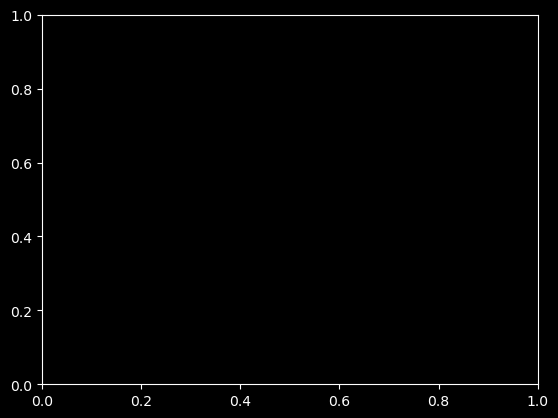

In [132]:
unit=1334	
df1 = df_units[df_units.probe=='C'][df_units.KSlabel=='good']
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              ymax=60,binsize=0.05,pre=2.0,axes=ax,color='#487697')

psth.psth_line(times=df1[df1.index==unit].times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_delivery_timestamp') ].start_time.values,
              ymax=60,binsize=0.05,pre=2.0,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              axes=ax[0],color='#487697',timeDomain=True,post=3,ms=8)
psth.raster(times=df1[df1.index==unit].times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_delivery_timestamp') ].start_time.values,
              axes=ax[1],color='#ffaa00',timeDomain=True,post=3,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

### Plot bassed on manually curated PHY units

In [ ]:
unit=1
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_baseline') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_perturbation') ].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_baseline') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_perturbation') ].start_time.values[1::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

In [ ]:
# Print version information
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("h5py version:", h5py.__version__)
print("pynwb version:", pynwb.__version__)
# print("dlab version:", dlab.__version__)
# print("tqdm version:", tqdm.__version__)
print("open_ephys version:", Session.__module__)  # If open_ephys is not installed, this will raise an error
print("hdmf version:", H5DataIO.__module__)  # If hdmf is not installed, this will raise an error
# print("nwbwidgets version:", nwbwidgets.__version__)